## Description
### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import the necessary packages

In [9]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#Libraies to builde the logistic regression model
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    make_scorer,

)

## Import the data

In [10]:
data = pd.read_csv("Loan_Modelling.csv")

In [11]:
# create a copy of the data to avoid any changes to the original data
loan = data.copy()

In [12]:
# Display 10 random sample rows of the dataset
loan.sample(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
869    870   54          30      29    93014       2    0.8          1   
3712  3713   50          25     112    92154       1    0.6          1   
261    262   42          16     111    93106       2    1.2          3   
2543  2544   64          39      24    94117       4    0.6          2   
2020  2021   59          34      33    94303       3    0.2          1   
1732  1733   25           0      88    94566       2    1.8          2   
2451  2452   51          25     119    93940       1    4.9          1   
3922  3923   31           4      20    95616       4    1.5          2   
4035  4036   34           9     180    93955       2    6.5          3   
1361  1362   50          26      38    95039       4    0.9          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
869          0              0                   0           0       0   
3712         0              0                   0           0       0   
261        251              1                   0           0       1   
2543         0              0                   0           0       0   
2020         0              0                   1           0       0   
1732       319              0                   0           0       1   
2451       208              0                   0           0       1   
3922         0              0                   0           0       1   
4035         0              1                   0           1       1   
1361         0              0                   0           0       1   

      CreditCard  
869            1  
3712           0  
261            0  
2543           0  
2020           0  
1732           1  
2451           1  
3922           0  
4035           0  
1361           0

In [13]:
# we will drop the ID Columns as it does not add a predictibility value
loan.drop("ID", axis=1, inplace=True)

In [14]:
loan.sample(5)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
642    50          24     103    94132       1    0.3          1         0   
2500   28           2     121    92096       2    2.0          1       341   
1126   32           8     104    95192       2    3.7          1         0   
2711   39          14      34    94939       4    1.7          1         0   
4830   37          12      60    95616       4    2.1          3       217   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
642               0                   0           0       1           0  
2500              0                   0           0       1           0  
1126              1                   0           0       0           1  
2711              0                   0           0       1           1  
4830              0                   0           0       1           0

In [15]:
# viewing the shape of the data set
loan.shape

(5000, 13)

All variable types are int except CCAvg is float, hence let us display the 5-point summary of the data

### Checking for null and duplicate values

In [16]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No Null values in the dataset

In [17]:
loan.duplicated().sum()

0

No duplicated values in the dataset

In [18]:
# viewing the variables datatypes
loan.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Five point summary

In [19]:
loan.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

Observation:
- The min **Age** is **23** , max is **67** , Average is **45** Years old - Data seems reasonable and normaly  distributed
- The min **Experience** is **-3** years which does not seem reasonable, hence requires a closer look
- The min **Income** is **USD 46k**, max is **USD 224K**  and average is **USD 64K** - Dataset seems to be right skewed
- The **Zip codes** shall not be treated as an integer value as it reflects location - Requires data pre-processing
- The min **Family size** is **1**, max is **4**  and average is **2** - Dataset seems reasonable and almost uniformly distributed and can be treated as a categorical variable as it holds only 4 values
- The min **CCAvg** is **USD 0k** (which can be reflecting customers who do not own credit cards), max is **USD 1.9K**  and average is **USD 10K** - Dataset seems reasonable and right skewed
- The **Education** is a categorical variable where 1: Undergrad; 2: Graduate;3: Advanced/Professional
- The min **Mortgage** is **USD 0k**, max is **USD 635K**  and average is **USD 0K** - Dataset heavily right skewed
- The **Personal_Loan** is a categorical variable where 1: customer accepted the personal loan offered in the last campaign and 0:customer didnot accept
- The **Securities_Account** is a categorical variable where 1: customer has Securities_Account 0:customer does not have Securities_Account
- The **CD_Account** is a categorical variable where 1: customer has CD_Account 0:customer does not have CD_Account
- The **Online** is a categorical variable where 1: customer uses online banking 0:customer does use online banking
- The **CreditCard** is a categorical variable where 1: customer use a credit card issued by any other Bank 0:customer does not use a credit card issued by any other Bank




## Data Preprosessing

### 1. Experience column (*Treating the -ve value rows*)

In [20]:
# displaying how many rows carries a negative value
print(f'There are {len(loan[loan["Experience"] < 0])} rows with a negative value')

There are 52 rows with a negative value


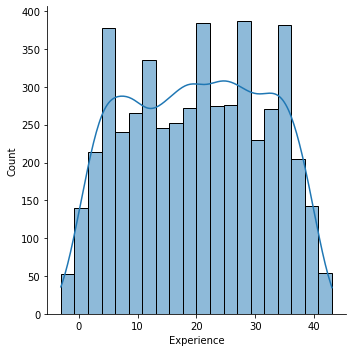

In [21]:
# let us plot the distribution of the Experience variable and view the skeweness (if any) to decide on
# the best amputation approach

sns.displot(x=loan["Experience"], kde=True)

The data distribution is roughly taking the shape of a uniformly distributed curve.
Accordingly, the approach to amputate the -ve values is by setting them equal to the median

In [22]:
loan["Experience"] = loan["Experience"].apply(
    lambda x: loan["Experience"].median() if x < 0 else x
)

In [23]:
# checking the value counts to confirm amputation is successful
len(loan[loan["Experience"] < 0])

0

No more negative values in the variable Experience

### 2. Zip code conversion
Using the "uszipcode" library, we extract the "City" and "State" from the zipcode of every customer

In [26]:
#import the searchengine from uszipcode library
from uszipcode import SearchEngine

#create the search engine
search = SearchEngine()

#create a function to get the city from the zipcode
def get_city(x):
    return search.by_zipcode(x).city

#create a function to get the state from the zipcode
def get_state(x):
    return search.by_zipcode(x).state

In [27]:
#create 2 empty lists to fill with city and state for each customer
the_city_ = []
the_state_=[]

#create a for loop to loop on the zipcodes, extract the city and state and fill the lists
for i in np.arange(0,5000):
    try:
        city = get_city(loan["ZIPCode"].iloc[i])
        the_city_.append(city)
        state = get_state(loan["ZIPCode"].iloc[i])
        the_state_.append(state)
    except:
        the_city_.append(np.nan)
        the_state_.append(np.nan)
    continue

In [28]:
#Adding the city and state lists as new columns in the dataset
loan['City'] = the_city_
loan['State'] = the_state_
loan.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25         1.0      49    91107       4    1.6          1         0   
1   45        19.0      34    90089       3    1.5          1         0   
2   39        15.0      11    94720       1    1.0          1         0   
3   35         9.0     100    94112       1    2.7          2         0   
4   35         8.0      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City State  
0       Pasadena    CA  
1    Los Angeles    CA  
2       Berkeley    CA  
3  San Francisco    CA  
4     Northridge    CA

In [29]:
#explorying the null values added in the dataframe from the city and state lists
loan['City'].isnull().value_counts()

False    4966
True       34
Name: City, dtype: int64

In [30]:
loan['State'].isnull().value_counts()

False    4966
True       34
Name: State, dtype: int64

34 values are missing

In [31]:
#extracting the zipcodes that are returning the nan values
zip_nan = loan[loan['City'].isnull()]
zip_nan['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

There are 4 unique Zip codes reflecting as NAN in the city column.

In [32]:
# Checking the same for the state column
zip_nan_state = loan[loan['State'].isnull()]
zip_nan_state['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

The missing city and state values share the same ZIP codes.
We will search manually for the 4 unique codes online and replace the nan with the actual value

In [33]:
#Create a dictionary with the Zip code googled City and State
zip_dict = {'92717':'Irvine, CA',
             '96651':'Rudno nad Hronom, BC',
             '92634':'Fullerton, CA',
             '93077':'Ventura, CA'
            }

#Create a function to fill the missing values
def fill_nan(data, indxs, value, column):
    for i in indxs:
        data[column].iloc[i]=value
        
#Create a for loop to fill in the missing city and state values    
for i in zip_dict.keys():
    indxs = loan[loan['ZIPCode']==int(i)].index
    fill_nan(loan, indxs, zip_dict[str(i)].split(',')[0], 'City')
    fill_nan(loan, indxs, zip_dict[str(i)].split(',')[1], 'State')

#confirm null values are removed in City and State columns
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
State                 0
dtype: int64

Let us view the variability of states and cities

In [34]:
#Display value counts of states
loan['State'].value_counts()

CA     4966
 CA      28
 BC       6
Name: State, dtype: int64

There are two main states CA (majority) and BC, yet "CA" and " CA" can be merged and " BC" to "BC" for a better homoginity

In [35]:
loan['State'].replace(' CA','CA',inplace=True)
loan['State'].replace(' BC','BC',inplace=True)
loan['State'].value_counts()

CA    4994
BC       6
Name: State, dtype: int64

In [36]:
#Display value counts of Cities
loan['City'].value_counts()

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Tahoe City         1
Stinson Beach      1
Ladera Ranch       1
Sausalito          1
Sierra Madre       1
Name: City, Length: 245, dtype: int64

There are 245 different cities in the dataset, most customers are from Los Angeles, San Diego, San Francisco, Berkeley and Sacramento 

Finally, we drop the ZIP Code column

In [37]:
loan.drop('ZIPCode', axis =1, inplace=True)

Date is ready for the EDA 

## Exploratory Data Analysis on the data
### 1. Univariate analysis 

### a. Visualizing the numerical data

From the 5 point summary, it is observed that **Age, Experience, Income, CCAvg and Mortgage** are numerical and continous in nature, hence we will define and apply a function to plot the **histogram & boxplot** for each variable

In [38]:
#we will define a function to plot the boxplot and histogram for all numerical variables
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Age

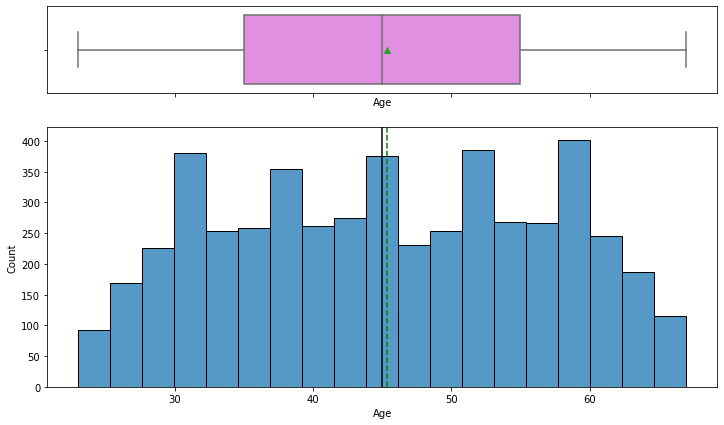

In [39]:
histogram_boxplot(loan,'Age')

- The min is 23 , max is 67 , Average is 45 Years old - Data seems is slightly fitting a uniform distribution.
- The maximum number of clients is within the 58-60 years old range, there are also peak counts at 30-32, 38-40, 44-46 and 52-54 years old
- There are no outliers observed.



### Experience

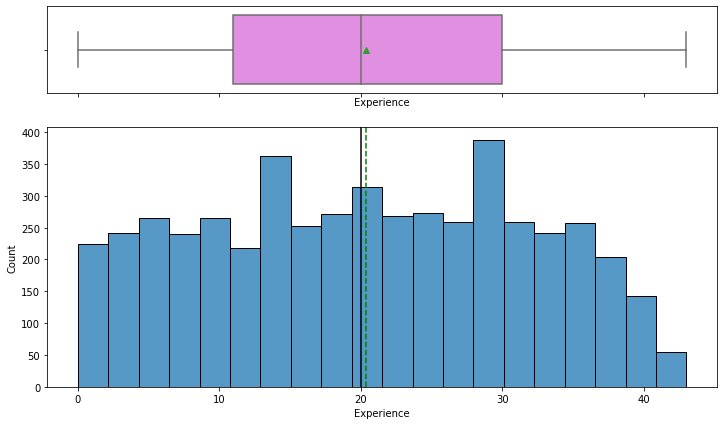

In [40]:
histogram_boxplot(loan,'Experience')

- The min Experience is 0 years, the max is 43 and the mean is approximatly 20 years.
- The data is almost fitting a uniform distribution with peaks at 12-14 years and 28-30 years
- There are no outliers observed

### Income

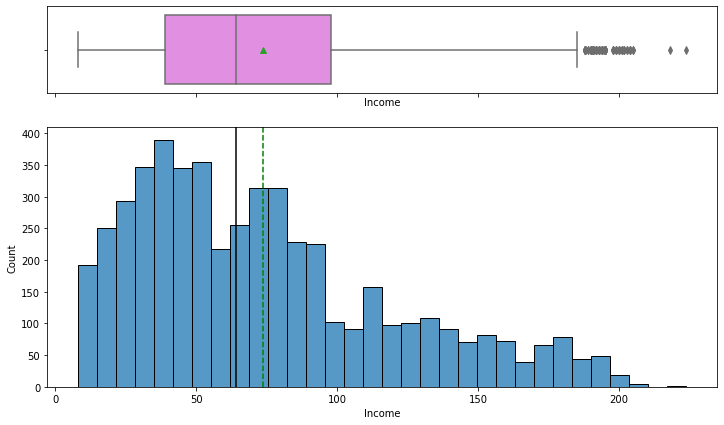

In [41]:
histogram_boxplot(loan,'Income')

- The min Income is USD 46k, max is USD 224K and average is USD 64K - Dataset is right skewed
- There is a number of outliers, yet they seem consistent with the data hence no action is required for outlier treatment


### CCAvg

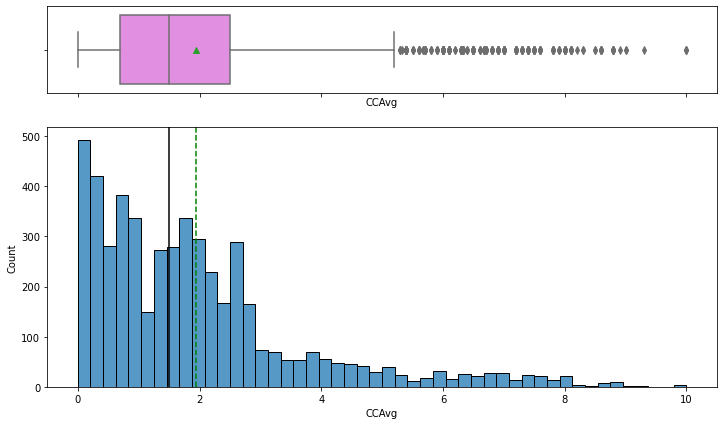

In [42]:
histogram_boxplot(loan,'CCAvg')

- The min CCAvg is USD 0k (which can be reflecting customers who do not own credit cards), max is USD 1.9K and average is approx USD 1.9K
- Dataset is right skewed with a number of outliers that seem homogenous with the data, hence no action required for the outliers 

### Mortgage

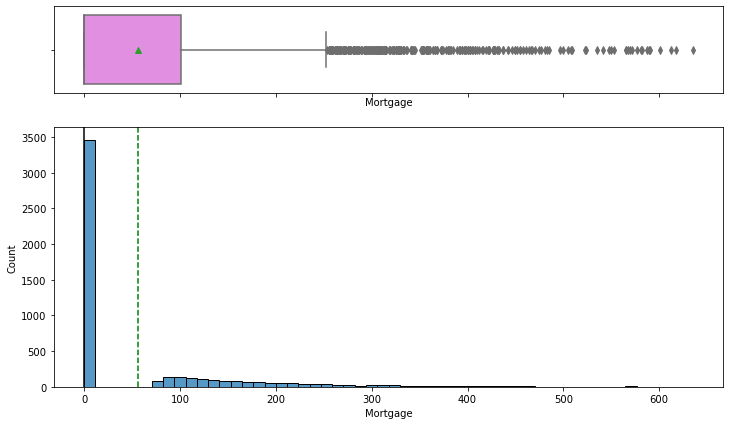

In [43]:
histogram_boxplot(loan,'Mortgage')

- The min Mortgage is USD 0k, max is USD 635K and average is USD 0K - Dataset heavily right skewed
- To visualize better, we will separate the USD 0k mortgage from the > USD 0K mortgage and plot the data again

In [44]:
#extracting the customers with mortgage values > 0 
mortgage = loan[loan['Mortgage']>0]
print(f'There are {len(mortgage)} customers under mortgage and forms {round((len(mortgage)/5000)*100)}% of the dataset')

There are 1538 customers under mortgage and forms 31% of the dataset


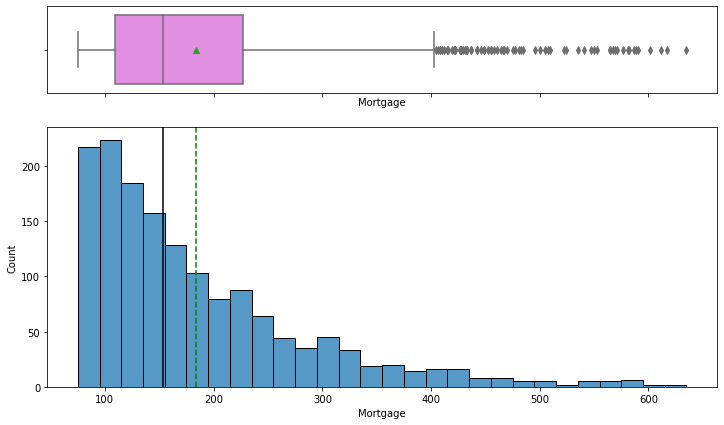

In [45]:
#plotting the mortgage of the customers
histogram_boxplot(mortgage,'Mortgage')

- The mortgage distibution of the customers under mortgage is right skewed with a minimum value of approx 99K to max value of 635K and mean value between  USD 180-200K .

### a. Visualizing the categorical data

From the 5 point summary, it is observed that **Zip codes, Family size, Education, Personal_Loan, CD_Account, Online and CreditCard** are categorical in nature, hence we will define and apply a function to plot a **labelled barplot** for each variable

In [46]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##  Zip codes_Cities

Very small scale in the vertical barplot hence, we plot the cities on a horizontal count plot

<AxesSubplot:xlabel='count', ylabel='City'>

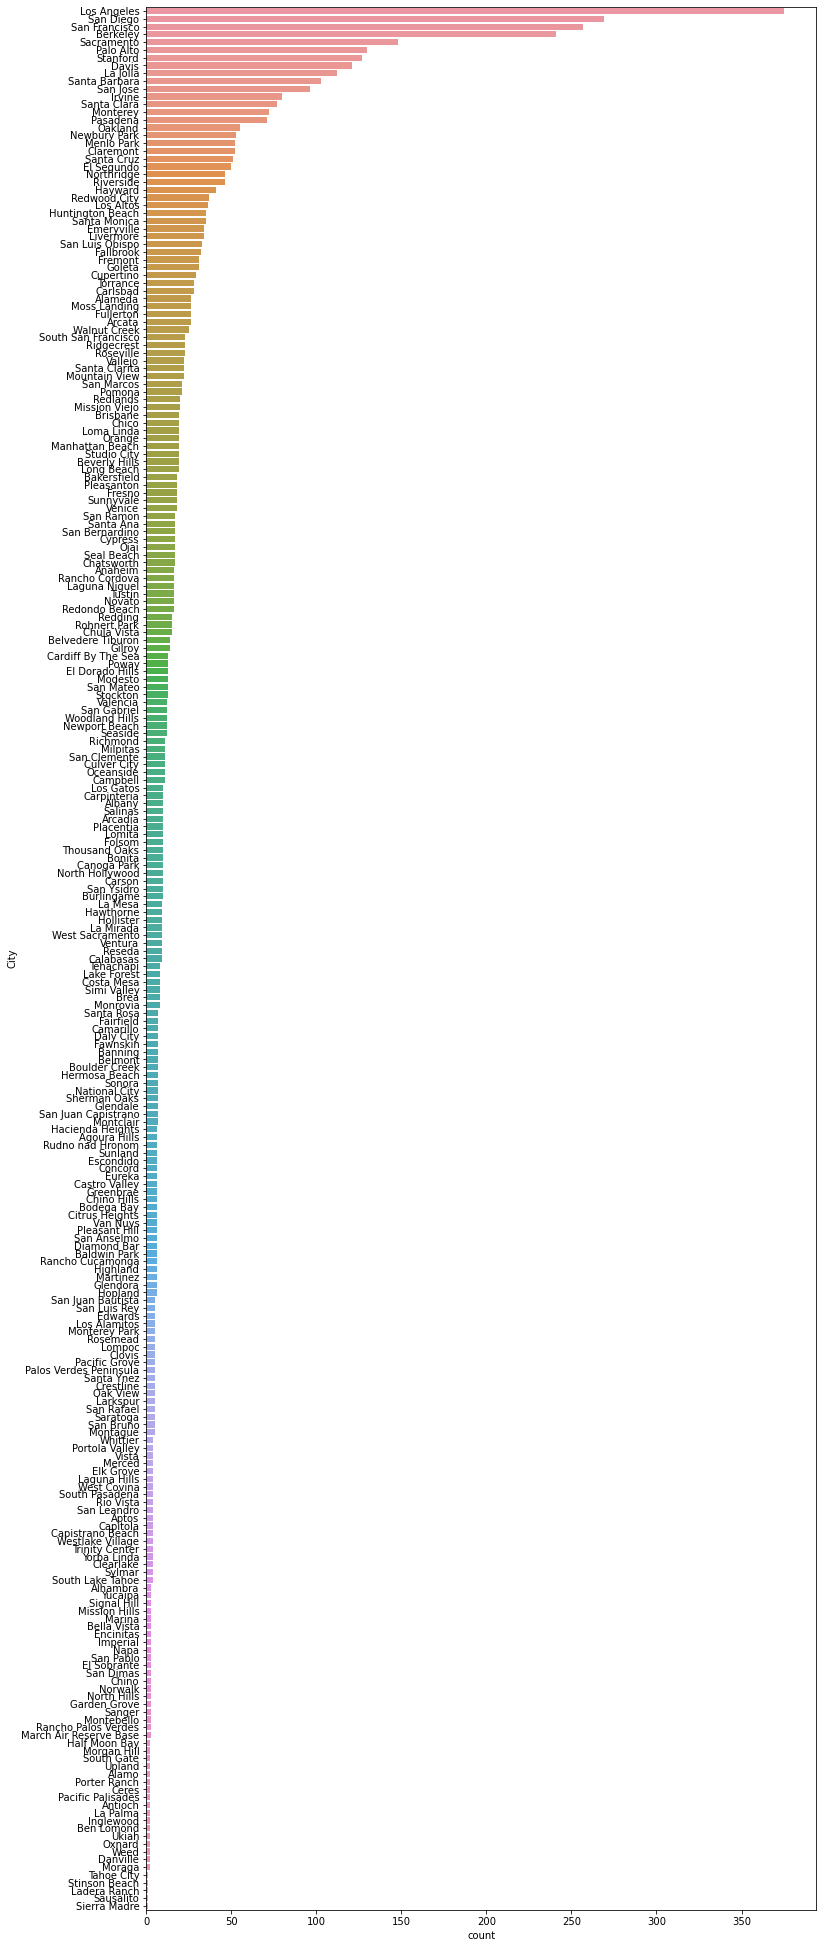

In [47]:
plt.figure(figsize=(12,35))
sns.countplot(data=loan, y='City', order=loan['City'].value_counts().index)

Approx. **25.8%** of the customers reside in Los Angeles, San Diego, San Fransisco, Berkeley and Sacramento (these are the top 5 cities) with the top city is Los Angeles where 7.5% of the customers reside.

|City|No. of customers|
|:-------|:------:|
Los Angeles|      375|
San Diego   |     269|
San Francisco|    257|
Berkeley      |   241|
Sacramento     |  148|

### Family size

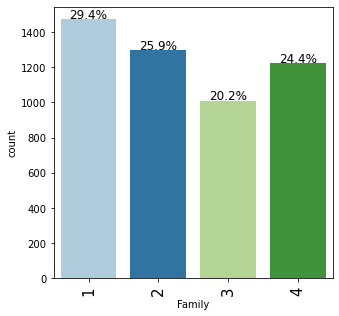

In [48]:
labeled_barplot(loan,'Family',perc=True)

The majority of Family sizes (29.4%) is size 1, followed by (25.9%) of size 2 then (24.4%) of size 4 and finally (20.2%) of size 3.

## Education

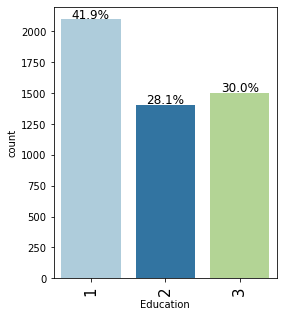

In [49]:
labeled_barplot(loan,'Education',perc=True)

- 41.9% of customers are 1: Undergrad
- 28.1% of customers are 2: Graduate
- 30.0% of customers are 3: Advanced/Professional


## Personal_Loan

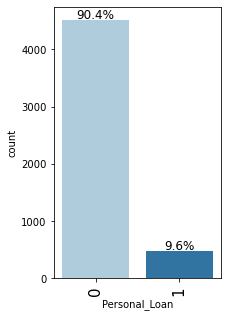

In [50]:
labeled_barplot(loan,'Personal_Loan',perc=True)

- 90.4% of customers **Did not** accept a loan
- 9.6% of customers accepted a loan


**Note!** This mismatch needs to be considered while training the model 

## CD_Account

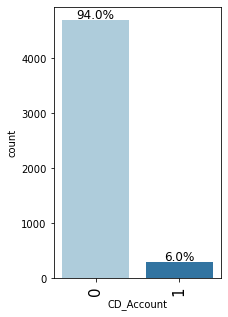

In [51]:
labeled_barplot(loan,'CD_Account',perc=True)

- 94% of customers **Do Not** have a CD_Account
- 6% only have a CD_Account

## Online

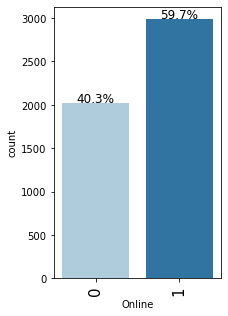

In [52]:
labeled_barplot(loan,'Online',perc=True)

- 59.7% of customers use the online banking services
- 40.3% of customers do not use the online banking services

## CreditCard

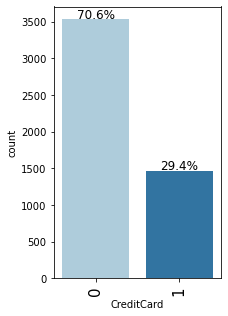

In [53]:
labeled_barplot(loan,'CreditCard',perc=True)

- 70.6% of customers do not use a credit card issued by a different bank
- 29.4% of customers use a credit card issued by a different bank

### 2. Bivariate analysis 

We start with a simple pair plot to view if there is correlation between the data set variables

<Figure size 1080x1080 with 0 Axes>

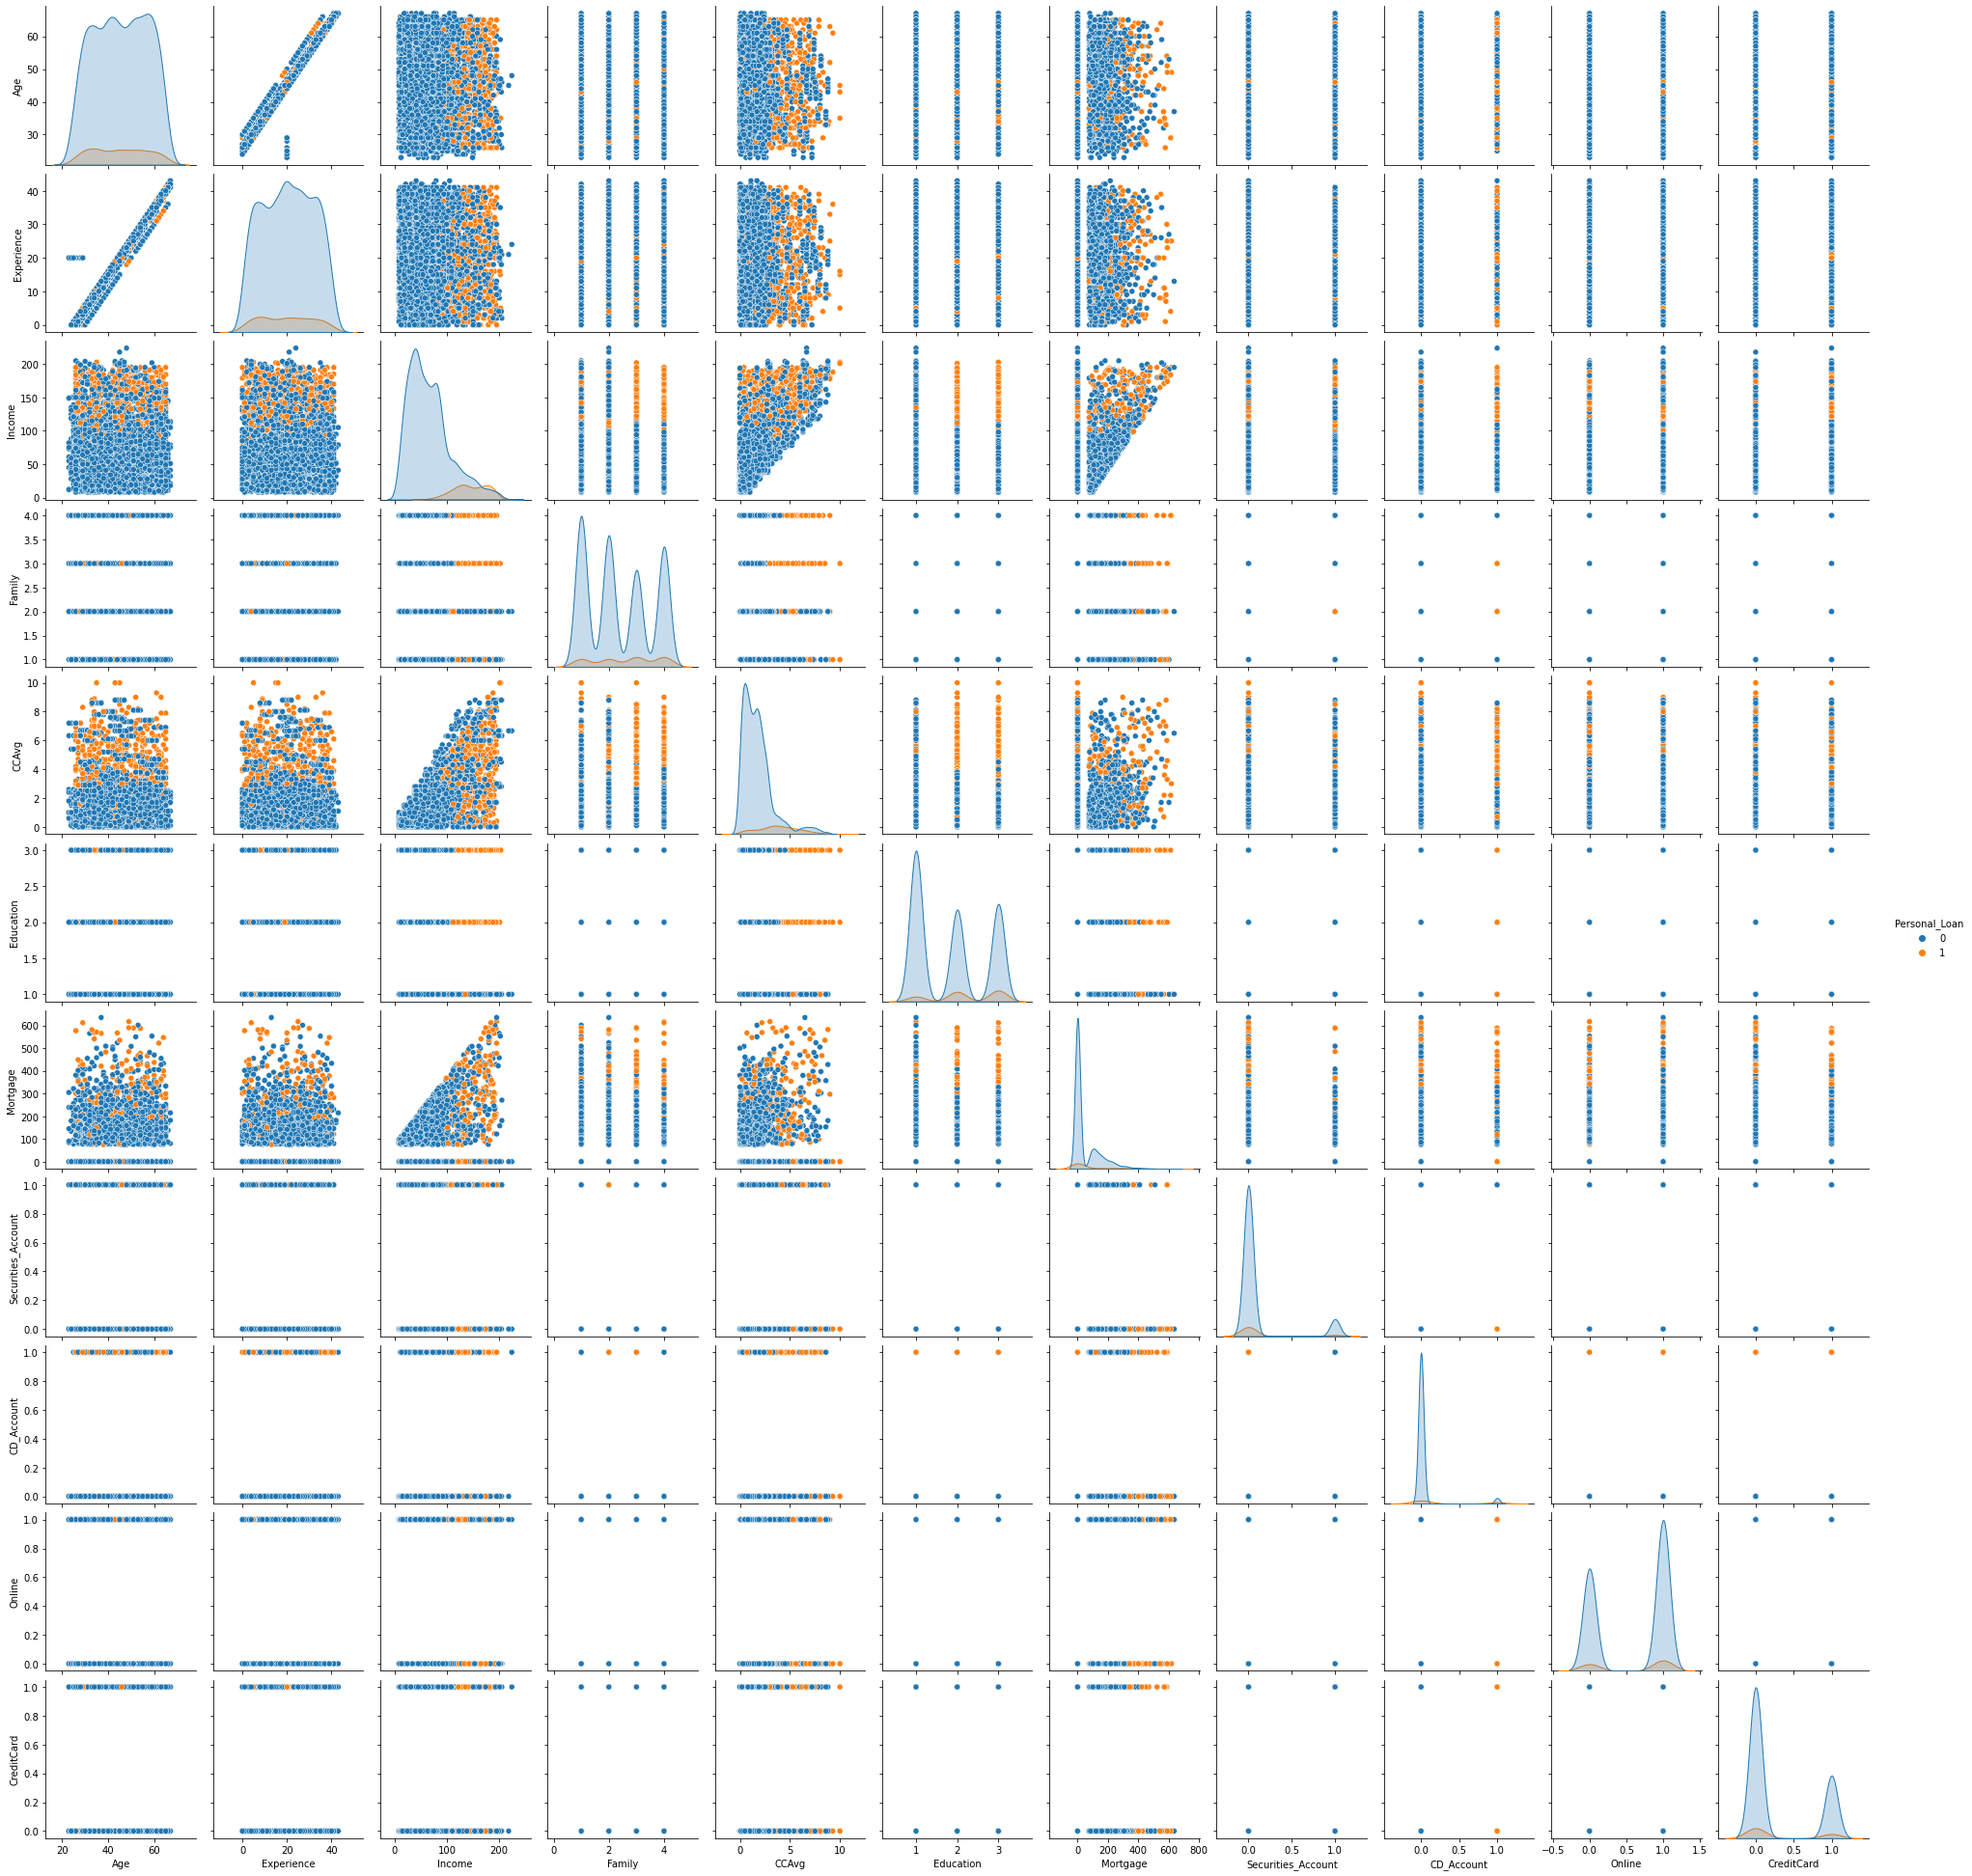

In [54]:
plt.figure(figsize=(15,15))
# sns.pairplot(loan, diag_kind='kde')
sns.pairplot(loan, hue="Personal_Loan")
plt.show()

Observations:
- The orange spots present the customers who accepted a personal_loan and the blue spots show the ones who did not.
- From the univariate analysis of the **personal_loan** dataset it was observed that only 9.6% of the customers accepted the personal loan, hence this observation is consistent with the pair plot where the majority of the spots are blue
- It is observed that there is a very strong linear corelation between **Age** and **Experience**
- It is observed that there is a slight correlation between **Income** and **CCAvg**
- High concentraion of customers who accepted a personal loan are observed at:
    - Higher Income level (starting at approx USD 100K and above)
    - Higher CCAvg (starting at approx USD 3K and above)
    - Higher Mortgage value (starting at approx USD 300K and above)
    - Customers with CD_Accounts
    - Customers who use credict cards issued from other banks
    - Famillies with sizes 3 or 4
    - Customers with Eductaion 2(graduate) or 3 (advanced/professional)
    
    
Hence, we do have an idea to expect the abova variables to have a medium to high prediction power on the classification models.

<AxesSubplot:>

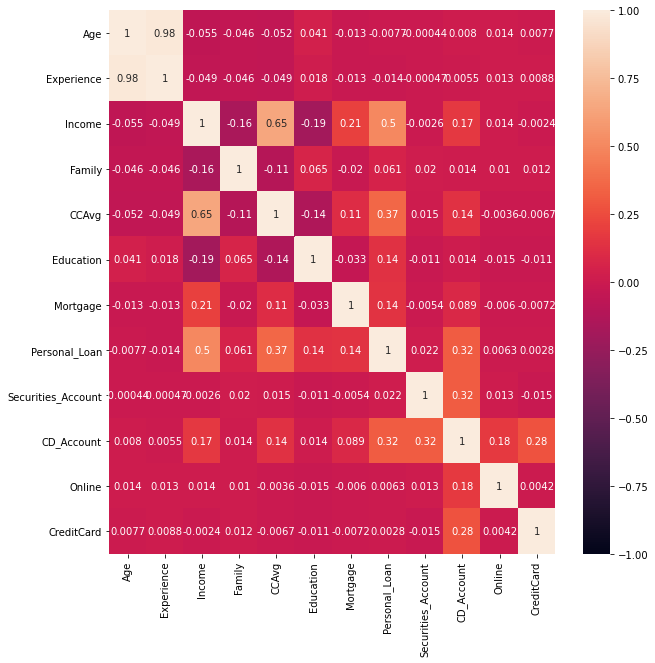

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(loan.corr(),vmax=1,vmin=-1,annot=True)

The correlation heatmap supports the correlation observed in the pairplot where:
- The correlation between Age and Experience is very high (value = 0.98)
- The correlation between Income and CCAvg is low (value = 0.65)
- All other correlation values are quiet small for consideration

## Observing the variables effect on the target variable
### a. Plotting the target VS distribution of numerical variables
Let us plot the target VS distribution of the variables to understand further our data set prior building the model

In [56]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [57]:
loan.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'City', 'State'],
      dtype='object')

### Age VS Personal_Loan

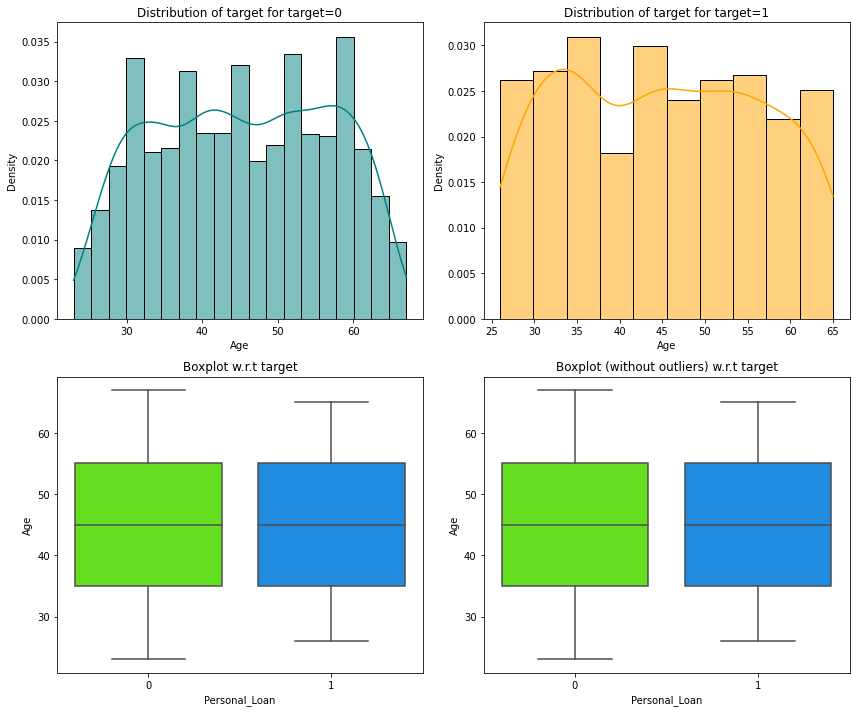

In [58]:
distribution_plot_wrt_target(loan,'Age','Personal_Loan')

- It is observed that the mean age for customers accepting and not accepting personal loans is very close to the value 45 years.
- As expected from the pair plot Age does not have a relation with our target variable, hence a negligible prediction power

### Experience VS Personal_Loan

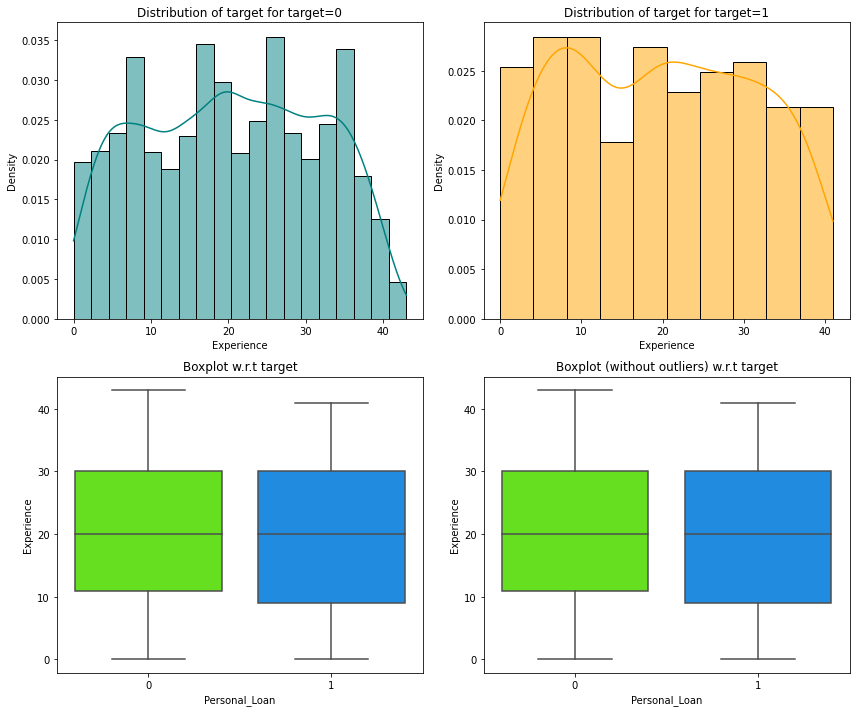

In [59]:
distribution_plot_wrt_target(loan,'Experience','Personal_Loan')

- It is observed that the mean Experience for customers accepting and not accepting personal loans is very close to the value 20 years
- As expected from the pair plot, Experience does not have a relation hence a prediction power on our target variable

### Income VS Personal_Loan

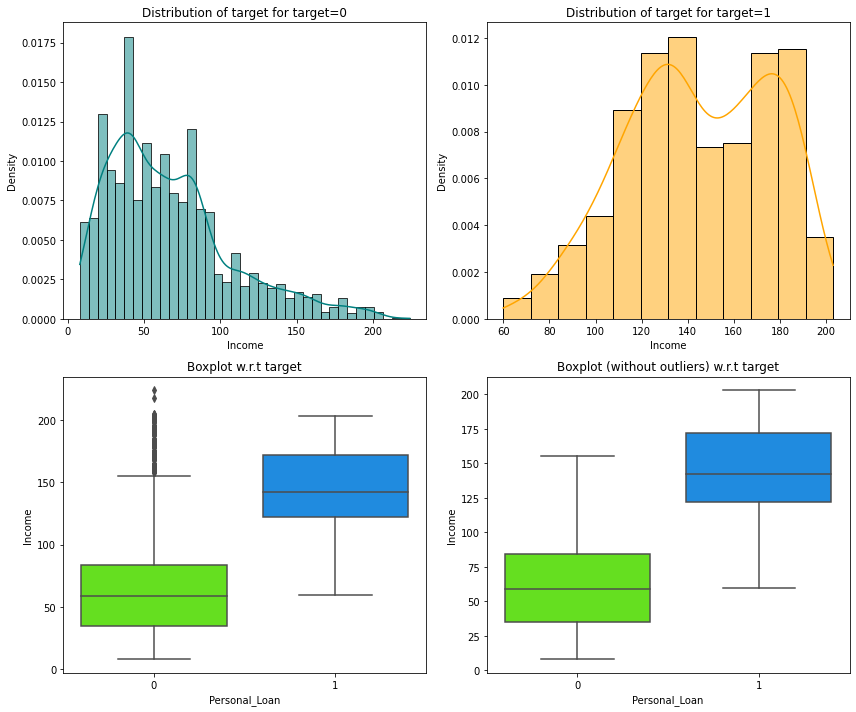

In [60]:
distribution_plot_wrt_target(loan,'Income','Personal_Loan')

- As expected, The Income variable varies greatly between customers who accepted and not accepted the personal loan.
- The mean income for the customers who **did not accept** the loan is approx USD 65K
- The mean income for the customers who **did accept** the loan is approx USD 145K
- This shows that the income level of the customer has a high impact on the customer decision to accept a personal loan, **The higher the income, the more chances the customer will accept a personal loan**

### Mortgage VS Personal_Loan

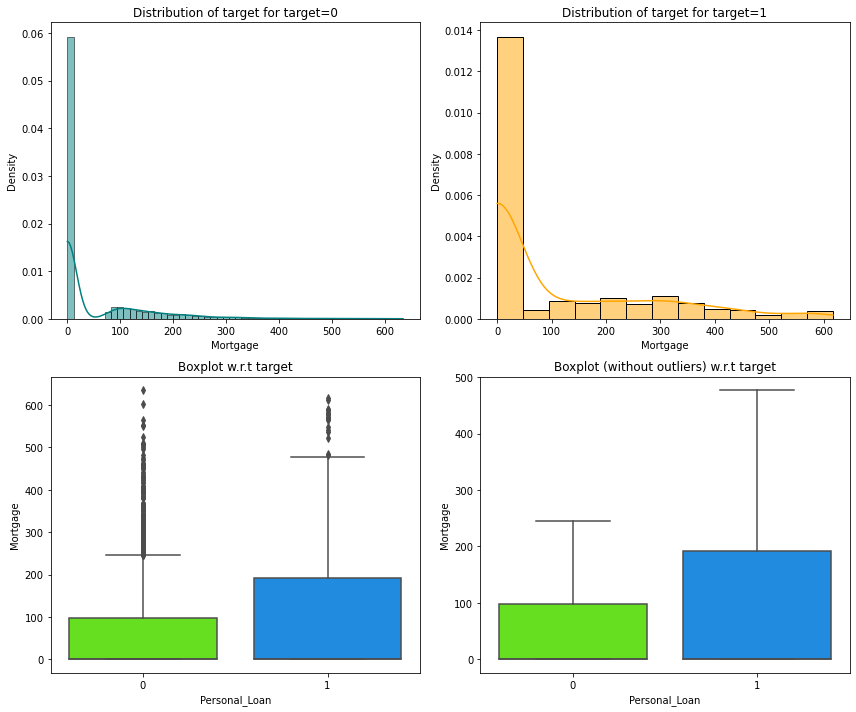

In [61]:
distribution_plot_wrt_target(loan,'Mortgage','Personal_Loan')

- It is observed that the customers paying mortage are more likely to accept personal loan, yet As the variable distribution is heavily right skewed due to the high number of customers not paying mortgage, we will plot the distribution of the customers paying mortgage only which are consolidated in the dataframe **mortgage**. This will give us a better insight on the mortgage mean value for customers accepting vs custmers not accepting a personal loan.

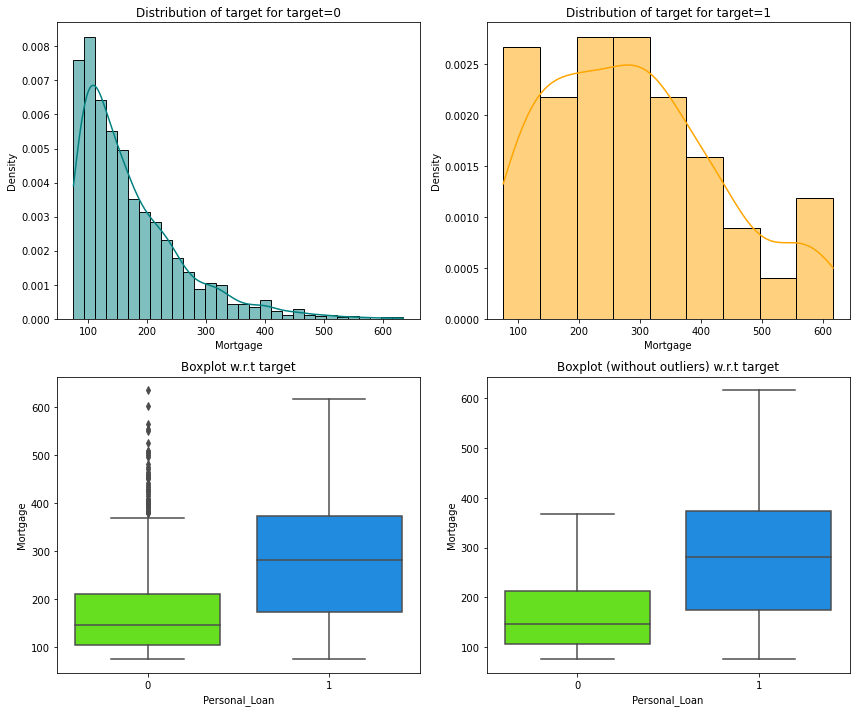

In [62]:
distribution_plot_wrt_target(mortgage,'Mortgage','Personal_Loan')

- It is observed that the mean value of mortgage paid by customers **not accepting** a personal loan is approx USD 150K USD which is much less than the mean value of customers accepting personal loan of approx USD 290K. hence **As the mortgage value increase, the customer is more likely to accept a personal loan**

### CCAvg VS Personal_Loan

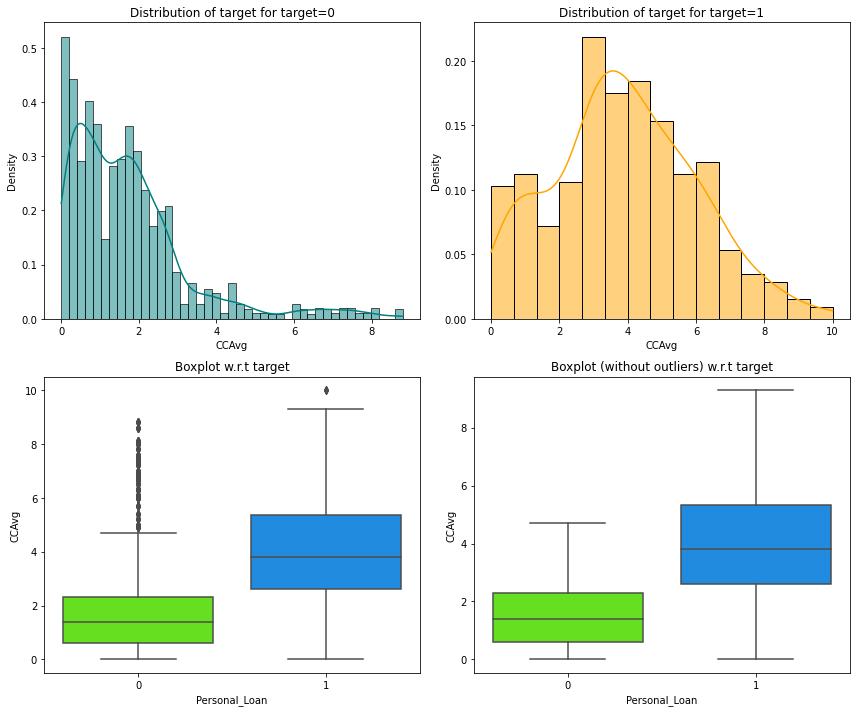

In [63]:
distribution_plot_wrt_target(loan,'CCAvg','Personal_Loan')

- It is observed that the mean value of CCAvg of customers **not accepting** a personal loan is approx USD 1.6 K USDmuch less than the mean value of customers accepting personal loan of approx USD 4K. hence **customers who accept personal loan spends more money on monthly basis**

### b. Plotting the target VS distribution of categorical variables

In [64]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Family VS Personal_Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


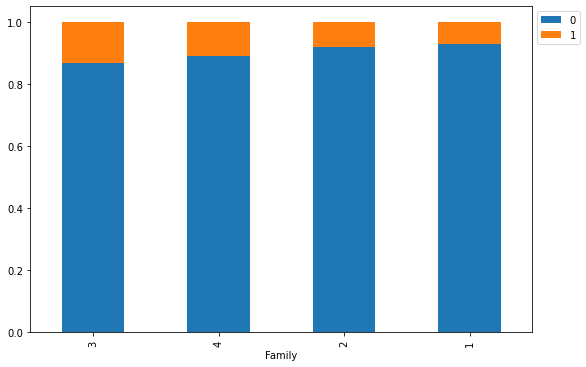

In [65]:
stacked_barplot(loan,'Family','Personal_Loan')

It is observed that famillies of size 3 or 4 have more proportion of accepting a personal loan. Hence as the **familly size grows, customers are more willing to accept personal loans**  

### Education VS Personal_Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


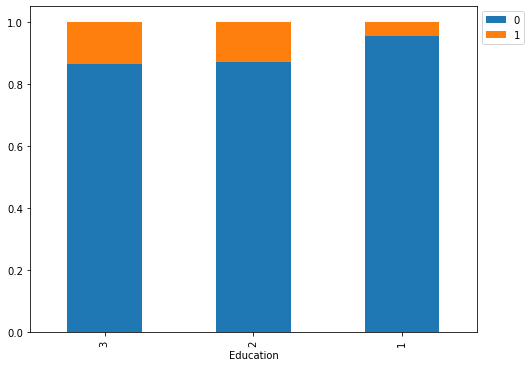

In [66]:
stacked_barplot(loan,'Education','Personal_Loan')

It is observed that customers with education level 2 and 3 are more willing to accept a personal loan that education level 1. The top proportion is observed at customers with education level 3

### Securities_Account VS Personal_Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


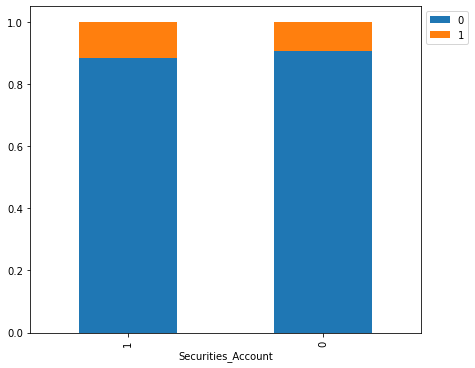

In [67]:
stacked_barplot(loan,'Securities_Account','Personal_Loan')

It is observed that **customers with Security account are more willing to accept a personal loan**

### CD_Account VS Personal_Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


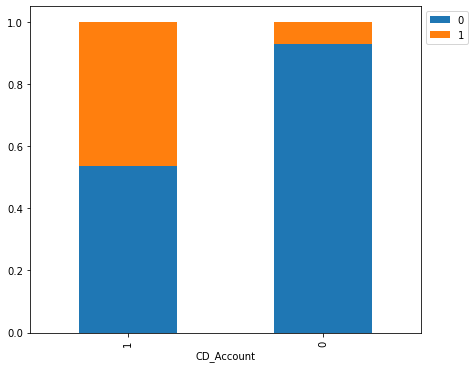

In [68]:
stacked_barplot(loan,'CD_Account','Personal_Loan')

It is observed that **customers with CD_account are more willing to accept a personal loan**

### Online VS Personal_Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


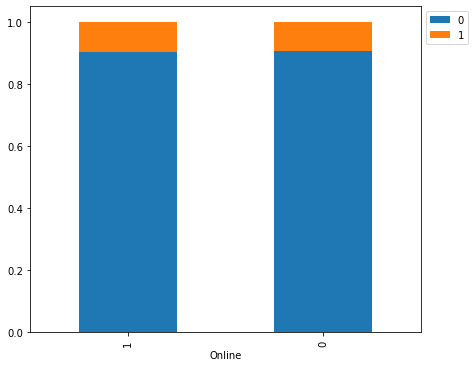

In [69]:
stacked_barplot(loan,'Online','Personal_Loan')

- It is observed that customers who use iternet banking services and who do not use internet banking services are almost **equally likely to accept personal loans**

### CreditCard  VS Personal_Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


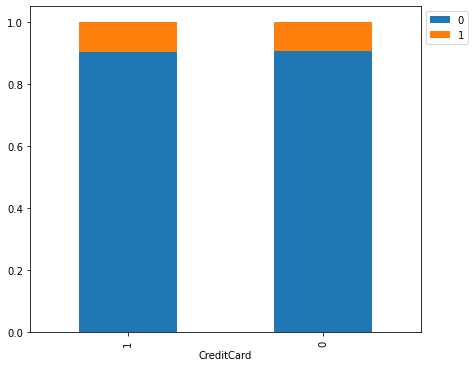

In [70]:
stacked_barplot(loan,'CreditCard','Personal_Loan')

- It is observed that customers who use credit cards issued by other banks and those who do not are almost **equally likely to accept personal loans**

### City  VS Personal_Loan

For a better visualization, We assign a threshold to pick the most common cities between the customers and assign the remaining to others. The created data frame will only be used to visualize how the most common cities varies with the personal loan and **will not** be used at the modelling stage.

In [71]:
#assigning the threshold
cities = loan['City'].value_counts()
threshold = 50
cities[cities.values >= threshold]

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
Palo Alto        130
Stanford         127
Davis            121
La Jolla         112
Santa Barbara    103
San Jose          96
Irvine            80
Santa Clara       77
Monterey          72
Pasadena          71
Oakland           55
Newbury Park      53
Menlo Park        52
Claremont         52
Santa Cruz        51
El Segundo        50
Name: City, dtype: int64

In [72]:
# the threshhold of 50 seems alright, hence we extract the cities names 
cities_list = cities[cities.values >= threshold].index.tolist()
print("Cities names taken into consideration:", len(cities_list), cities_list)

Cities names taken into consideration: 21 ['Los Angeles', 'San Diego', 'San Francisco', 'Berkeley', 'Sacramento', 'Palo Alto', 'Stanford', 'Davis', 'La Jolla', 'Santa Barbara', 'San Jose', 'Irvine', 'Santa Clara', 'Monterey', 'Pasadena', 'Oakland', 'Newbury Park', 'Menlo Park', 'Claremont', 'Santa Cruz', 'El Segundo']


In [73]:
#we create a copy of the data frame as we are doing this transformation only for better visualization
loan_2 = loan.copy()

In [74]:
loan_2['City'] = loan_2['City'].apply(lambda x:x if x in cities_list else 'others')

In [75]:
# function to plot horizontal stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="barh", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
City                          
All            4520  480  5000
others         2181  227  2408
Los Angeles     337   38   375
Berkeley        214   27   241
San Diego       248   21   269
San Francisco   238   19   257
Palo Alto       114   16   130
La Jolla         97   15   112
Stanford        114   13   127
Sacramento      135   13   148
Santa Clara      65   12    77
San Jose         85   11    96
Irvine           69   11    80
Pasadena         61   10    71
Santa Barbara    95    8   103
Santa Cruz       44    7    51
Monterey         66    6    72
Davis           115    6   121
Oakland          50    5    55
El Segundo       45    5    50
Claremont        48    4    52
Menlo Park       48    4    52
Newbury Park     51    2    53
------------------------------------------------------------------------------------------------------------------------


<Figure size 720x2880 with 0 Axes>

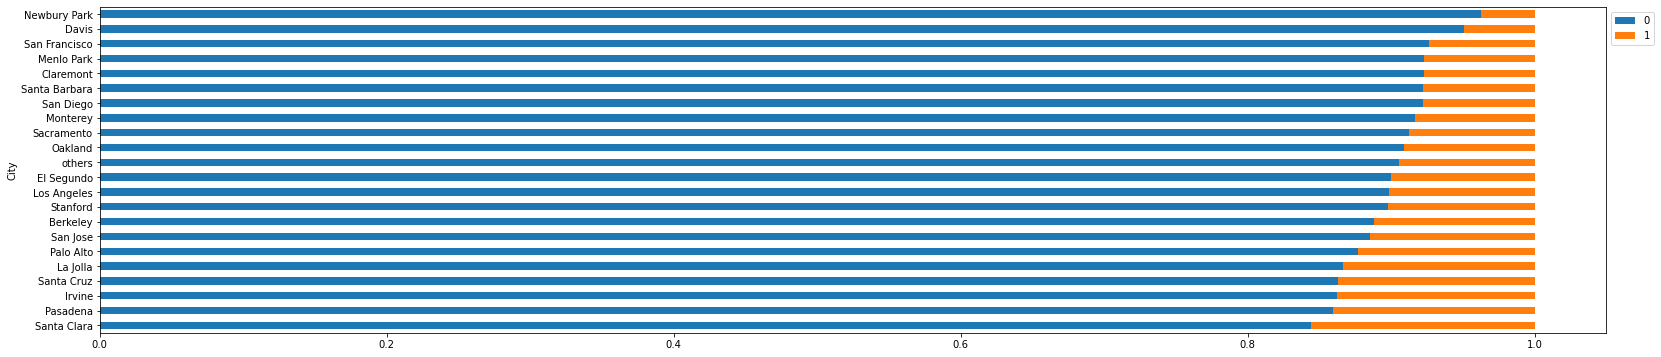

In [76]:
#plotting a horizonal stacked bar plot
plt.figure(figsize=(10,40))
stacked_barplot(loan_2,'City','Personal_Loan')

- It is observed that Santa Clara shows the greatest ratio of customers willing to accept personal loans followed by Pasadena and Irvine

### State VS Personal_Loan

Personal_Loan     0    1   All
State                         
CA             4514  480  4994
All            4520  480  5000
BC                6    0     6
------------------------------------------------------------------------------------------------------------------------


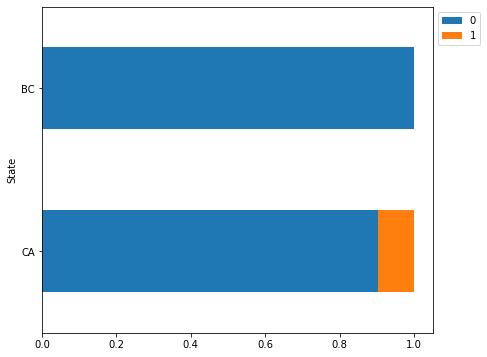

In [77]:
stacked_barplot(loan,'State','Personal_Loan')

- The customers residing in CA are more willing to accept personal loans than the customers in BC

## Key Insights based on EDA

The Five point summary for all the variables including the city and state added columns:

In [78]:
loan.describe(include='all').T

count unique          top  freq     mean       std  min  \
Age                 5000    NaN          NaN   NaN  45.3384   11.4632   23   
Experience          5000    NaN          NaN   NaN  20.3276    11.253    0   
Income              5000    NaN          NaN   NaN  73.7742   46.0337    8   
Family              5000    NaN          NaN   NaN   2.3964   1.14766    1   
CCAvg               5000    NaN          NaN   NaN  1.93794   1.74766    0   
Education           5000    NaN          NaN   NaN    1.881  0.839869    1   
Mortgage            5000    NaN          NaN   NaN  56.4988   101.714    0   
Personal_Loan       5000    NaN          NaN   NaN    0.096  0.294621    0   
Securities_Account  5000    NaN          NaN   NaN   0.1044  0.305809    0   
CD_Account          5000    NaN          NaN   NaN   0.0604   0.23825    0   
Online              5000    NaN          NaN   NaN   0.5968  0.490589    0   
CreditCard          5000    NaN          NaN   NaN    0.294  0.455637    0   
City                5000    245  Los Angeles   375      NaN       NaN  NaN   
State               5000      2           CA  4994      NaN       NaN  NaN   

                    25%  50%  75%  max  
Age                  35   45   55   67  
Experience           11   20   30   43  
Income               39   64   98  224  
Family                1    2    3    4  
CCAvg               0.7  1.5  2.5   10  
Education             1    2    3    3  
Mortgage              0    0  101  635  
Personal_Loan         0    0    0    1  
Securities_Account    0    0    0    1  
CD_Account            0    0    0    1  
Online                0    1    1    1  
CreditCard            0    0    1    1  
City                NaN  NaN  NaN  NaN  
State               NaN  NaN  NaN  NaN

### Key observations on the univariate analysis:
- The min **Age** is 23 , max is 67 , Average is 45 Years old - Data seems is slightly fitting a uniform distribution.
- The min **Experience** is 0 years, the max is 43 and the mean is approximatly 20 years.
- - The min **CCAvg** is USD 0k (which can be reflecting customers who do not own credit cards), max is USD 1.9K and average is USD 10K
- 369% of the customers are not paying mortage and the remainig 31% paying minimum value of approx 99K to max value of 635K and mean value between USD 180-200K for mortage
- The top 5 **cities** are Los Angeles followed by San Diego, San Fransisco, Berkeley and Sacramento
- The top **State** is CA
- The majority of **Family** sizes (29.4%) is size 1, followed by (25.9%) of size 2 then (24.4%) of size 4 and finally (20.2%) of size 3.
- Customer **Education** is distributed as follow:
    - 41.9% of customers are 1: Undergrad
    - 28.1% of customers are 2: Graduate
    - 30.0% of customers are 3: Advanced/Professional
- A total of 94% of customers Do Not have a **CD_Account** and 6% only have a CD_Account
- A total of 40.3% of customers do not use the online banking services and 59.7% do.
- A total of 70.6% of customers do not hold a **credit card** and 29.4% of customers hold credit cards,
- The target variable **Personal_Loan** shows 90.4% of customers **Did not** accept a loan and 9.6% of customers accepted a loan

### Key Insights and Observations on the multivariate analysis:
#### Correlation between variables
- The correlation between Age and Experience is very high (value = 0.98)
- The correlation between Income and CCAvg is low (value = 0.65)
- All other correlation values are quiet small for consideration

#### The effect of variables on the target variable
Summed up in the below table, the independent variables and how do they affect the target variable.

|Variable|Effect on Target Variable|
|:------|:--------------|
|Income|The higher the income, the more chances the customer will accept a personal loan|
|Family|As familly size grows, customers are more willing to accept personal loans|
|CCAvg|As the monthly spending of customers increase, the more they are willing to accept personal loan|
|Education|As the Education level of the customers increase, they are more willing to accept a personal loan|
|Mortgage|As the mortgage value increase, the customer is more likely to accept a personal loan|
|City|Santa Clara shows the greatest ratio of customers willing to accept personal loans followed by Pasadena and Irviner|
|State|The customers residing in CA are more willing to accept personal loans|
|Securities_Account|customers with Security account are more willing to accept a personal loan|
|CD_Account|Customers with CD_account are more willing to accept a personal loan|
|Online|No observed effect on the target variable|
|Age|No observed effect on the target variable|
|Experience|No observed effect on the target variable|
|CreditCard|No observed effect on the target variable|


#### Expected target dependencies 
- Low importance is expected for the variables: **Age, Experience, Credit card and Online**
- High to mediam importance is expected for **Income, Familly, CCAvg, Education, Mortgage, Security Account and CD_Account**


## Data Preparation for modelling

Note! Earlier on in the code the below Data Pre-proccesing actions were applied:
1. ID column: dropped
2. Experience column: Negative values replaced by Median
3. ZIP Code Column: Split into City and state then dropped

Now we move on to Data preparation for modelling


### 1. Creating the dummy variables

In [79]:
loan.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'City', 'State'],
      dtype='object')

In [80]:
df_model = pd.get_dummies(
    loan,
    columns=[
        "Education",
        "City",
        "State",
    ],
    drop_first=True,
)
df_model.head()

Age  Experience  Income  Family  CCAvg  Mortgage  Personal_Loan  \
0   25         1.0      49       4    1.6         0              0   
1   45        19.0      34       3    1.5         0              0   
2   39        15.0      11       1    1.0         0              0   
3   35         9.0     100       1    2.7         0              0   
4   35         8.0      45       4    1.0         0              0   

   Securities_Account  CD_Account  Online  CreditCard  Education_2  \
0                   1           0       0           0            0   
1                   1           0       0           0            0   
2                   0           0       0           0            0   
3                   0           0       0           0            1   
4                   0           0       0           1            1   

   Education_3  City_Alameda  City_Alamo  City_Albany  City_Alhambra  \
0            0             0           0            0              0   
1            0             0           0            0              0   
2            0             0           0            0              0   
3            0             0           0            0              0   
4            0             0           0            0              0   

   City_Anaheim  City_Antioch  City_Aptos  City_Arcadia  City_Arcata  \
0             0             0           0             0            0   
1             0             0           0             0            0   
2             0             0           0             0            0   
3             0             0           0             0            0   
4             0             0           0             0            0   

   City_Bakersfield  City_Baldwin Park  City_Banning  City_Bella Vista  \
0                 0                  0             0                 0   
1                 0                  0             0                 0   
2                 0                  0             0                 0   
3                 0                  0             0                 0   
4                 0                  0             0                 0   

   City_Belmont  City_Belvedere Tiburon  City_Ben Lomond  City_Berkeley  \
0             0                       0                0              0   
1             0                       0                0              0   
2             0                       0                0              1   
3             0                       0                0              0   
4             0                       0                0              0   

   City_Beverly Hills  City_Bodega Bay  City_Bonita  City_Boulder Creek  \
0                   0                0            0                   0   
1                   0                0            0                   0   
2                   0                0            0                   0   
3                   0                0            0                   0   
4                   0                0            0                   0   

   City_Brea  City_Brisbane  City_Burlingame  City_Calabasas  City_Camarillo  \
0          0              0                0               0               0   
1          0              0                0               0               0   
2          0              0                0               0               0   
3          0              0                0               0               0   
4          0              0                0               0               0   

   City_Campbell  City_Canoga Park  City_Capistrano Beach  City_Capitola  \
0              0                 0                      0              0   
1              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   

   City_Ca

In [81]:
#checking the shape of the dataset
df_model.shape

(5000, 258)

In [82]:
#checking the data types 
df_model.dtypes.value_counts()

uint8      247
int64        9
float64      2
dtype: int64

No boolean or object data types, dataset is ready to go

### 2. Splitting the data

In [83]:
X = df_model.drop('Personal_Loan',axis=1)
y = df_model['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [84]:
#Checking the train and test dataset sizes for confirmation
print(f'X_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}')

X_train shape:(3500, 257)
X_test shape:(1500, 257)


In [85]:
#checking the percentage of target variable classes in the train and test sets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


As observed earlier on as well in the univariate analysis, the class 1 proportion is only 9.5% of the data set.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will accept a loan but in reality the customer would not accept a loan. - Loss of resources

2. Predicting a customer will not accept a loan but in reality the customer would have accepted a loan. - Loss of opportunity  

### Which case is more important? 

* If we predict a customer who was going to accept a loan as a customer who will not accept a loan - loss of opportunity (FN)

### How to reduce this loss (False Negatives)?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### Hence, we will start  by creating functions to calculate different metrics and confusion matrix for the models we will derive
* The **get_recall_score function** will be used to check the model performance of models. 
* The **make_confusion_matrix function** will be used to plot confusion matrix.

In [86]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [87]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Model building
## 1. Logistic Regression

First, we start by defining the functions that supports the performance evaluation of the Logistic Regression Model.
- **confusion_matrix_sklearn_with_threshold** (Builds the confusion matrix of the classification model)
- **model_performance_classification_sklearn_with_threshold**(Computes the different metrics)
- **plot_prec_recall_vs_tresh** (plots precission and recall VS Threshold)

In [88]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [90]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

### Building the Model

In [91]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is applied as it is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

### Finding the coefficients

In [92]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age  Experience   Income    Family     CCAvg  Mortgage  \
Coefficients  0.073387   -0.069595  0.05528  0.666774  0.198034  0.001007   

              Securities_Account  CD_Account    Online  CreditCard  \
Coefficients           -0.854033    3.228361 -0.525927   -0.872277   

              Education_2  Education_3  City_Alameda  City_Alamo  City_Albany  \
Coefficients     3.271701     3.419706     -0.095819   -0.003247    -0.076855   

              City_Alhambra  City_Anaheim  City_Antioch  City_Aptos  \
Coefficients       -0.71161     -0.277276     -0.176175    -0.06355   

              City_Arcadia  City_Arcata  City_Bakersfield  City_Baldwin Park  \
Coefficients     -0.154314    -0.489062          0.715042          -0.072769   

              City_Banning  City_Bella Vista  City_Belmont  \
Coefficients      0.851673          0.000922     -0.005738   

              City_Belvedere Tiburon  City_Ben Lomond  City_Berkeley  \
Coefficients                0.016243        -0.009025       0.231047   

              City_Beverly Hills  City_Bodega Bay  City_Bonita  \
Coefficients           -0.207518        -0.064966    -0.304383   

              City_Boulder Creek  City_Brea  City_Brisbane  City_Burlingame  \
Coefficients           -0.340651  -0.019321      -0.493934        -0.380213   

              City_Calabasas  City_Camarillo  City_Campbell  City_Canoga Park  \
Coefficients        0.490975        0.052119      -0.053046         -0.202368   

              City_Capistrano Beach  City_Capitola  City_Cardiff By The Sea  \
Coefficients               -0.07068       0.119824                 0.934968   

              City_Carlsbad  City_Carpinteria  City_Carson  \
Coefficients      -0.811081          0.053576     -0.02229   

              City_Castro Valley  City_Ceres  City_Chatsworth  City_Chico  \
Coefficients            0.002976         0.0        -0.123793   -0.169132   

              City_Chino  City_Chino Hills  City_Chula Vista  \
Coefficients   -0.000802         -0.132353          0.300301   

              City_Citrus Heights  City_Claremont  City_Clearlake  \
Coefficients            -0.104475        0.049126       -0.016172   

              City_Clovis  City_Concord  City_Costa Mesa  City_Crestline  \
Coefficients    -0.002174     -0.010241         0.053273       -0.032662   

              City_Culver City  City_Cupertino  City_Cypress  City_Daly City  \
Coefficients          -0.28126       -0.093152     -0.060357       -0.008706   

              City_Danville  City_Davis  City_Diamond Bar  City_Edwards  \
Coefficients      -0.018892   -0.816916         -0.400897     -0.001916   

              City_El Dorado Hills  City_El Segundo  City_El Sobrante  \
Coefficients             -0.091124        -0.142711          0.475559   

              City_Elk Grove  City_Emeryville  City_Encinitas  City_Escondido  \
Coefficients        0.142751        -0.470703       -0.003856       -0.005775   

              City_Eureka  City_Fairfield  City_Fallbrook  City_Fawnskin  \
Coefficients     0.058941         -0.0659       -0.460627       0.292712   

              City_Folsom  City_Fremont  City_Fresno  City_Fullerton  \
Coefficients    -0.025747      0.196118     -0.05376        0.191903   

              City_Garden Grove  City_Gilroy  City_Glendale  City_Glendora  \
Coefficients          -0.001349    -0.057371       0.670185      -0.058023   

              City_Goleta  City_Greenbrae  City_Hacienda Heights  \
Coefficients     -0.26003         0.88385              -0.014368   

              City_Half Moon Bay  City_Hawthorne  City_Hayward  \
Coefficients           -0.000087        0.080945      0.252025   

              City_Hermosa Beach  City_Highland  City_Hollister  City_Hopland  \
Coefficients           -0.141744      -0.111212       -0.022396     -0.090736   

              City_Huntington Beach  City_Imperial  City_Inglewood  \
Coefficients               0.174483      -0.010338       -0.005363   

              City_I

### Coefficient interpretations

In [94]:
#let us sort by descending order to easily recognize the more powerful variables
coef_df.sort_values(by='Coefficients',ascending=False).T

Education_3  Education_2  CD_Account  City_Los Gatos  \
Coefficients     3.419706     3.271701    3.228361        1.241226   

              City_Martinez  City_Cardiff By The Sea  City_Whittier  \
Coefficients       0.943688                 0.934968       0.907544   

              City_Greenbrae  City_Banning  City_Oak View  \
Coefficients         0.88385      0.851673       0.850844   

              City_Woodland Hills  City_West Sacramento  City_Irvine  \
Coefficients             0.812652              0.801475       0.7608   

              City_Riverside  City_Bakersfield  City_Venice  \
Coefficients        0.729187          0.715042     0.706424   

              City_Moss Landing  City_San Ysidro  City_Glendale    Family  \
Coefficients           0.705318         0.699031       0.670185  0.666774   

              City_Roseville  City_Seaside  City_San Juan Capistrano  \
Coefficients        0.550801      0.549576                   0.51583   

              City_Torrance  City_Reseda  City_Calabasas  City_Thousand Oaks  \
Coefficients       0.507745     0.504385        0.490975            0.489066   

              City_Ridgecrest  City_El Sobrante  City_Rohnert Park  \
Coefficients          0.48846          0.475559           0.463154   

              City_Lomita  City_San Jose  City_Vallejo  City_San Diego  \
Coefficients     0.453198       0.436461      0.407719        0.390713   

              City_Montebello  City_San Luis Rey  City_Santa Barbara  \
Coefficients         0.369761           0.359448            0.353012   

              City_Novato  City_Santa Cruz  City_Pasadena  City_Placentia  \
Coefficients     0.348169         0.311535       0.309918        0.302656   

              City_Chula Vista  City_Fawnskin  City_Richmond  City_Hayward  \
Coefficients          0.300301       0.292712       0.291022      0.252025   

              City_San Francisco  City_Sunnyvale  City_Berkeley  \
Coefficients             0.24562        0.233531       0.231047   

              City_Stanford  City_San Clemente     CCAvg  City_Fremont  \
Coefficients       0.220867           0.203032  0.198034      0.196118   

              City_Fullerton  City_Sacramento  City_Huntington Beach  \
Coefficients        0.191903         0.191138               0.174483   

              City_Sherman Oaks  City_Elk Grove  City_Laguna Niguel  \
Coefficients           0.154864        0.142751            0.130278   

              City_Los Altos  City_Monrovia  City_Capitola  City_Palo Alto  \
Coefficients        0.122782       0.120029       0.119824        0.106542   

              City_La Jolla  City_Oceanside  City_Hawthorne       Age  \
Coefficients        0.09599        0.083526        0.080945  0.073387   

              City_Ventura  City_Eureka   Income  City_Los Angeles  \
Coefficients      0.064848     0.058941  0.05528          0.054675   

              City_Carpinteria  City_Costa Mesa  City_Camarillo  \
Coefficients          0.053576         0.053273        0.052119   

              City_Claremont  City_Pleasanton  City_Norwalk  \
Coefficients        0.049126         0.044546      0.033576   

              City_Belvedere Tiburon  City_Pacific Grove  City_Castro Valley  \
Coefficients                0.016243            0.007065            0.002976   

              Mortgage  City_Bella Vista  State_CA  City_Valencia  \
Coefficients  0.001007          0.000922  0.000676       0.000028   

              City_San Dimas  City_Oxnard  City_Ladera Ranch  \
Coefficients             0.0          0.0                0.0   

              City_Stinson Beach  City_Ceres  City_Half Moon Bay  \
Coefficients                 0.0         0.0           -0.000087   

              City_Tahoe City  City_Pacific Palisades  City_Sausalito  \
Coefficients        -0.000191               -0.000327       -0.000378   

              City_Sylmar  City_Lompoc  City_Rudno nad Hronom  City_Chino  \
Coefficients    -0.000577    -0.000607              -0.000

In [95]:
#The positive coefficients
coef_df[coef_df['Coefficients']>0].sort_values(by='Coefficients',ascending=False).T

Education_3  Education_2  CD_Account  City_Los Gatos  \
Coefficients     3.419706     3.271701    3.228361        1.241226   

              City_Martinez  City_Cardiff By The Sea  City_Whittier  \
Coefficients       0.943688                 0.934968       0.907544   

              City_Greenbrae  City_Banning  City_Oak View  \
Coefficients         0.88385      0.851673       0.850844   

              City_Woodland Hills  City_West Sacramento  City_Irvine  \
Coefficients             0.812652              0.801475       0.7608   

              City_Riverside  City_Bakersfield  City_Venice  \
Coefficients        0.729187          0.715042     0.706424   

              City_Moss Landing  City_San Ysidro  City_Glendale    Family  \
Coefficients           0.705318         0.699031       0.670185  0.666774   

              City_Roseville  City_Seaside  City_San Juan Capistrano  \
Coefficients        0.550801      0.549576                   0.51583   

              City_Torrance  City_Reseda  City_Calabasas  City_Thousand Oaks  \
Coefficients       0.507745     0.504385        0.490975            0.489066   

              City_Ridgecrest  City_El Sobrante  City_Rohnert Park  \
Coefficients          0.48846          0.475559           0.463154   

              City_Lomita  City_San Jose  City_Vallejo  City_San Diego  \
Coefficients     0.453198       0.436461      0.407719        0.390713   

              City_Montebello  City_San Luis Rey  City_Santa Barbara  \
Coefficients         0.369761           0.359448            0.353012   

              City_Novato  City_Santa Cruz  City_Pasadena  City_Placentia  \
Coefficients     0.348169         0.311535       0.309918        0.302656   

              City_Chula Vista  City_Fawnskin  City_Richmond  City_Hayward  \
Coefficients          0.300301       0.292712       0.291022      0.252025   

              City_San Francisco  City_Sunnyvale  City_Berkeley  \
Coefficients             0.24562        0.233531       0.231047   

              City_Stanford  City_San Clemente     CCAvg  City_Fremont  \
Coefficients       0.220867           0.203032  0.198034      0.196118   

              City_Fullerton  City_Sacramento  City_Huntington Beach  \
Coefficients        0.191903         0.191138               0.174483   

              City_Sherman Oaks  City_Elk Grove  City_Laguna Niguel  \
Coefficients           0.154864        0.142751            0.130278   

              City_Los Altos  City_Monrovia  City_Capitola  City_Palo Alto  \
Coefficients        0.122782       0.120029       0.119824        0.106542   

              City_La Jolla  City_Oceanside  City_Hawthorne       Age  \
Coefficients        0.09599        0.083526        0.080945  0.073387   

              City_Ventura  City_Eureka   Income  City_Los Angeles  \
Coefficients      0.064848     0.058941  0.05528          0.054675   

              City_Carpinteria  City_Costa Mesa  City_Camarillo  \
Coefficients          0.053576         0.053273        0.052119   

              City_Claremont  City_Pleasanton  City_Norwalk  \
Coefficients        0.049126         0.044546      0.033576   

              City_Belvedere Tiburon  City_Pacific Grove  City_Castro Valley  \
Coefficients                0.016243            0.007065            0.002976   

              Mortgage  City_Bella Vista  State_CA  City_Valencia  
Coefficients  0.001007          0.000922  0.000676       0.000028

#### Positive coefficients:
- The Above table shows all variables with <font color=blue>Positive </font> cefficients  - i.e With value increase the propability of the customer to accept a personal loan increases.
- The top 5 variables affecting the target variable are:
    - Education_3
    - Education_2	
    - CD_Account	
    - City_Los Gatos		
    - City_Martinez

In [96]:
#The Negative coefficients
coef_df[coef_df['Coefficients']<0].sort_values(by='Coefficients').T

Intercept  City_Livermore  CreditCard  Securities_Account  \
Coefficients -14.415446       -0.877746   -0.872277           -0.854033   

              City_Davis  City_Carlsbad  City_Manhattan Beach  City_Alhambra  \
Coefficients   -0.816916      -0.811081             -0.787131       -0.71161   

              City_Milpitas  City_Monterey  City_Menlo Park  \
Coefficients      -0.596657      -0.551503          -0.5435   

              City_Redwood City    Online  City_Tustin  City_Loma Linda  \
Coefficients          -0.541571 -0.525927    -0.519978        -0.505844   

              City_Brisbane  City_Arcata  City_Emeryville  City_Fallbrook  \
Coefficients      -0.493934    -0.489062        -0.470703       -0.460627   

              City_Northridge  City_North Hollywood  City_Oakland  \
Coefficients        -0.442081             -0.438239     -0.427895   

              City_Redondo Beach  City_San Bernardino  City_Diamond Bar  \
Coefficients           -0.425562            -0.408148         -0.400897   

              City_Rancho Cordova  City_Burlingame  City_Santa Clara  \
Coefficients            -0.385524        -0.380213         -0.352743   

              City_Studio City  City_San Luis Obispo  City_Boulder Creek  \
Coefficients         -0.344993             -0.343207           -0.340651   

              City_South San Francisco  City_San Anselmo  City_Santa Ana  \
Coefficients                 -0.338335         -0.336261       -0.325207   

              City_Newbury Park  City_Mission Viejo  City_Bonita  \
Coefficients          -0.316256           -0.306527    -0.304383   

              City_Culver City  City_Laguna Hills  City_Mountain View  \
Coefficients          -0.28126          -0.279398           -0.278892   

              City_Anaheim  City_Redlands  City_Walnut Creek  City_Goleta  \
Coefficients     -0.277276      -0.269633          -0.261973     -0.26003   

              City_Merced  City_San Marcos  City_La Mesa  City_Santa Ynez  \
Coefficients    -0.233404         -0.23079     -0.210852        -0.207953   

              City_Beverly Hills  City_La Palma  City_Canoga Park  \
Coefficients           -0.207518      -0.207311         -0.202368   

              City_Modesto  City_Orange  City_Salinas  City_Marina  \
Coefficients     -0.198084    -0.197561     -0.195624    -0.193867   

              City_Redding  City_National City  City_Palos Verdes Peninsula  \
Coefficients     -0.185289           -0.178446                    -0.177287   

              City_Antioch  City_Sunland  City_Chico  City_San Leandro  \
Coefficients     -0.176175     -0.170932   -0.169132         -0.166818   

              City_West Covina  City_Montclair  City_Arcadia  \
Coefficients         -0.164751       -0.154486     -0.154314   

              City_San Juan Bautista  City_El Segundo  City_Hermosa Beach  \
Coefficients               -0.146558        -0.142711           -0.141744   

              City_San Ramon  City_Chino Hills  City_Simi Valley  \
Coefficients       -0.135793         -0.132353         -0.124156   

              City_Chatsworth  City_Lake Forest  City_Sierra Madre  \
Coefficients        -0.123793         -0.123658          -0.120899   

              City_Sanger  City_San Gabriel  City_Sonora  City_Rosemead  \
Coefficients    -0.118058         -0.117308    -0.114599      -0.113265   

              City_Tehachapi  City_Highland  City_Seal Beach  City_Ukiah  \
Coefficients       -0.112981      -0.111212        -0.110926   -0.106927   

              City_Citrus Heights  City_Monterey Park  City_Poway  \
Coefficients            -0.104475           -0.103569   -0.097266   

              City_Alameda  City_Cupertino  City_Rancho Cucamonga  \
Coefficients     -0.095819       -0.093152                -0.0921   

              City_El Dorado Hills  City_Hopland  City_Porter Ranch  \
Coefficients             -0.091124     -0.090736          -0.088947   

              City_Van Nuys  City_Los Alamitos  City_South 

#### Negative coefficients:
- The below table shows all variables with <font color=brown>Negative </font> cefficients  - i.e With value increase the propability of the customer to accept a personal loan decreases.
- The top 5 variables affecting the target variable are:
    - City_Livermore		
    - CreditCard	
    - Securities_Account	
    - City_Davis	
    - City_Carlsbad

### Coefficients interpretation in terms of odds 

In [96]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).sort_values(by='Odds',ascending=False)

Odds  Change_odd%
Education_3         30.560436  2956.043581
Education_2         26.356143  2535.614303
CD_Account          25.238246  2423.824618
City_Los Gatos       3.459851   245.985114
City_Martinez        2.569440   156.944005
...                       ...          ...
City_Carlsbad        0.444377   -55.562259
City_Davis           0.441792   -55.820799
Securities_Account   0.425695   -57.430526
CreditCard           0.417999   -58.200118
City_Livermore       0.415719   -58.428108

[257 rows x 2 columns]

The top 5 variables affecting the target variable positively are:
- Education_3 : increases the customer odds of accepting a personal loan by 30 times
- Education_2 :	increases the customer odds of accepting a personal loan by 26 times
- CD_Account : increases the customer odds of accepting a personal loan by 25 times
- City_Los Gatos : increases the customer odds of accepting a personal loan by 3.5 times	
- City_Martinez : increases the customer odds of accepting a personal loan by 2.5 times

The top 5 variables affecting the target variable Negatively are:
-  City_Livermore : decreases the customer odds of accepting a personal loan by 0.44 times
- CreditCard :	decreases the customer odds of accepting a personal loan by 0.44 times
- Securities_Account : decreases the customer odds of accepting a personal loan by 0.42 times
- City_Davis : decreases the customer odds of accepting a personal loan by 0.44 times	
- City_Carlsbad : decreases the customer odds of accepting a personal loan by 0.44 times

### Model Performamce Evaluation
#### Checking model performance on training set, threshold = 0.5

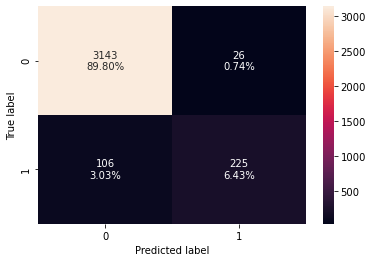

In [103]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

#### Checking performance on test set

In [104]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.962286  0.679758   0.896414  0.773196

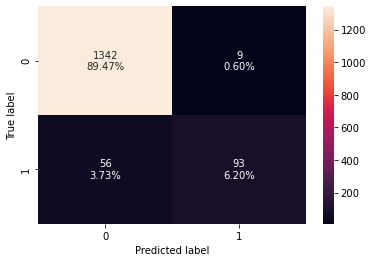

In [105]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [106]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.956667  0.624161   0.911765  0.741036

**Observation**:
The Recall on the training and test sets are close in value 62% and 68% respectively, yet the model performance needs to be improved as viewed from the confusion matrix as well:
- TP 6.20% which is less than tha 9% positive class of the dataset

#### Plotting the ROC-AUC for both training and test set

* ROC-AUC on training set

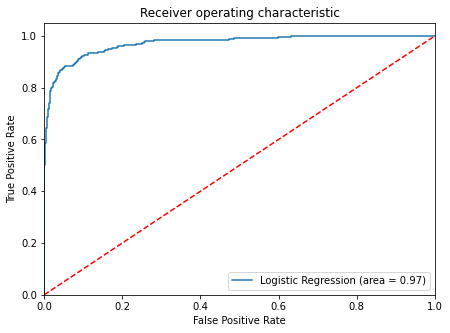

In [107]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

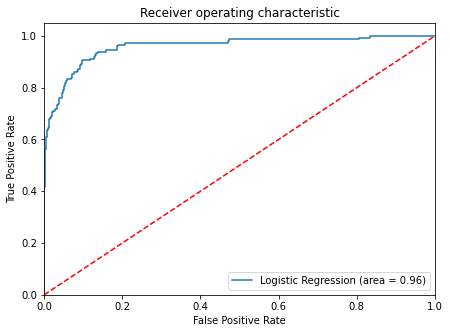

In [108]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The AUC of the test and train models ROC is 0.96 and 0.97 respectively which is very close to 1. This indicates that the model is very good yet requires some tuning. Hence, our approach is to tune the Threshold and observe how the model performance improves

## Model performance improvement

1- We derive the **optimal threshold from the AUC,ROC curve**

In [109]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
y_predict_train_proba = lg.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_predict_train_proba)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(f'The optimal threshhold from ROC AUC curve is : {optimal_threshold_auc_roc}')

The optimal threshhold from ROC AUC curve is : 0.1873087910754858


#### Checking model performance on training set

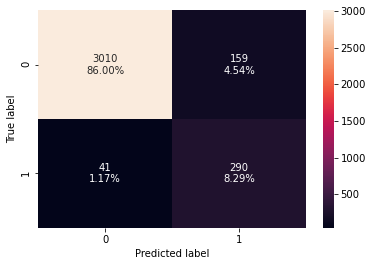

In [110]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [111]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance with optimal threshhold from ROC AUC curve")
log_reg_model_train_perf_threshold_auc_roc


Training performance with optimal threshhold from ROC AUC curve


Accuracy    Recall  Precision       F1
0  0.942857  0.876133    0.64588  0.74359

#### Checking model performance on test set

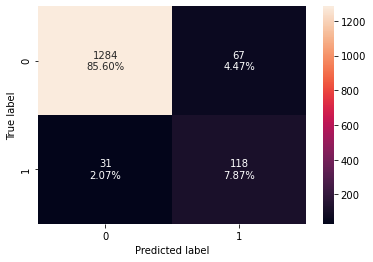

In [112]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [113]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0  0.934667  0.791946   0.637838  0.706587

The Recall and precision are improved from range of 60s to range of 80s, yet the TP in both confusion matrices (train and test) is still under the 9% of the original dataset. Hence, our second approach is to extract another threshold from the Recall - Precision VS Threshold curve

### Ploting the  Recall and Precision VS Threshold curve

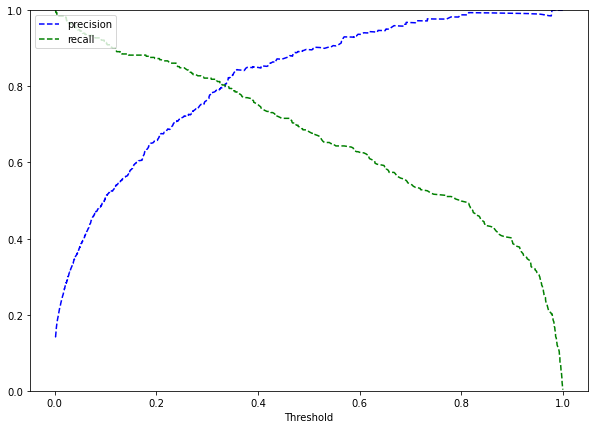

In [114]:
prec, rec, tre = precision_recall_curve(y_train, y_predict_train_proba)

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

It is observed that the intersection point of recall and precission is at approx threshold = 0.35 and gives a recall of approx 80% which is less than the optimal threshold derived from the ROC-AUC curve.
Therefore, our approach to enhance the model is to observe a value less than the optimal threshold of 0.187.
Hence, from the curve we can observe that at a threshold of approx 0.1, the Recall is approx at 90% and the precision is at approx 50%. Therefore, we will observe the model performance at this threshold value.

#### A threshold of 0.10 is picked to  Checking model performance on training and test tests

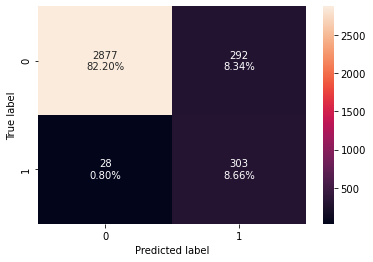

In [115]:
# creating confusion matrix for train set
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=0.10
)

In [116]:
# checking model performance for this model
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=0.10
)
print("Training performance with deduced threshhold from Precision - Recall curve is:")
log_reg_model_train_perf_threshold_curve


Training performance with deduced threshhold from Precision - Recall curve is:


Accuracy    Recall  Precision        F1
0  0.908571  0.915408   0.509244  0.654428

#### Checking model performance on test set

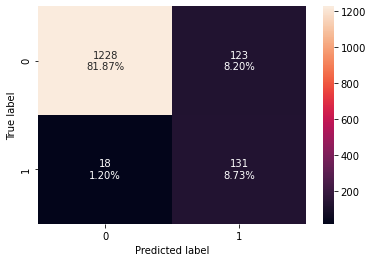

In [117]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=0.10
)

In [118]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=0.10
)
print("Training performance with deduced threshhold from the Precision - Recall curve is::")
log_reg_model_test_perf_threshold_curve

Training performance with deduced threshhold from the Precision - Recall curve is::


Accuracy    Recall  Precision        F1
0     0.906  0.879195   0.515748  0.650124

### Observation and conclusion:
At **threshold 0.10** the Recall for the test and train data sets is equal to **87%** and **91%** respectively which is a very good performance by the logistics regression model to **minimize** the **FN** on our model to only **1.20%** on the test set whilst maintaing a precision value of approx.**50%** for both test and train datasets.

## Apply sequential feature selector

In [119]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [120]:
# from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1, max_iter=100)

In [121]:
X_train.shape

(3500, 257)

In [122]:
# we will first build model with all varaible
sfs = SFS(
    model,
    k_features=257,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:    2.8s finished

[2022-02-25 14:36:01] Features: 1/257 -- score: 0.40456944185757754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    3.5s finished

[2022-02-25 14:36:05] Features: 2/257 -- score: 0.5370139749429014[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 255 | elapsed:    4.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:    4.6s finished

[2022-02-25 14:36:10] Features: 3/257 -- score: 0.5743776563448694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 216 out of 231 | elapsed:    5.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    5.8s finished

[2022-02-25 14:38:14] Features: 27/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    5.6s finished

[2022-02-25 14:38:20] Features: 28/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 214 out of 229 | elapsed:    5.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    5.9s finished

[2022-02-25 14:38:26] Features: 29/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    6.4s finished

[2022-02-25 14:42:50] Features: 53/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    6.2s finished

[2022-02-25 14:42:57] Features: 54/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    6.7s finished

[2022-02-25 14:43:03] Features: 55/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 con

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    7.1s finished

[2022-02-25 15:15:18] Features: 77/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.9s finished

[2022-02-25 15:15:25] Features: 78/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    7.2s finished

[2022-02-25 15:15:32] Features: 79/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | 

[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    8.3s finished

[2022-02-25 15:29:22] Features: 102/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    8.9s finished

[2022-02-25 15:29:31] Features: 103/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    8.5s finished

[2022-02-25 15:29:40] Features: 104/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    9.0s finished

[2022-02-25 15:29:49] Features: 105/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Usi

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    9.8s finished

[2022-02-25 15:34:10] Features: 132/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.0s finished

[2022-02-25 15:34:20] Features: 133/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    9.8s finished

[2022-02-25 15:34:30] Features: 134/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:   10.1s finished

[2022-02-25 15:34:40] Features: 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    9.9s finished

[2022-02-25 15:42:23] Features: 162/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   10.0s finished

[2022-02-25 15:42:33] Features: 163/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    9.9s finished

[2022-02-25 15:42:43] Features: 164/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:   10.0s finished

[2022-02-25 15:42:53] Features: 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    9.9s finished

[2022-02-25 15:47:27] Features: 192/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    9.8s finished

[2022-02-25 15:47:37] Features: 193/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    9.7s finished

[2022-02-25 15:47:47] Features: 194/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    9.8s finished

[2022-02-25 15:47:57] Features: 

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    6.9s finished

[2022-02-25 15:51:49] Features: 223/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    6.4s finished

[2022-02-25 15:51:55] Features: 224/257 -- score: 0.7569891049859626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    6.2s finished

[2022-02-25 15:52:01] Features: 225/257 -- score: 0.7569891049859626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    6.0s finished

[2022-02-25 15:52:08] Features: 226/257 -- score: 0.7569891049859626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    5.9s finished

[2022-02-25 15:52:14] Features: 227/257 -- score: 0.756989104985

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.5s finished

[2022-02-25 15:53:49] Features: 252/257 -- score: 0.7369376484002524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished

[2022-02-25 15:53:51] Features: 253/257 -- score: 0.7342874057724064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished

[2022-02-25 15:53:52] Features: 254/257 -- score: 0.7296624599709899[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

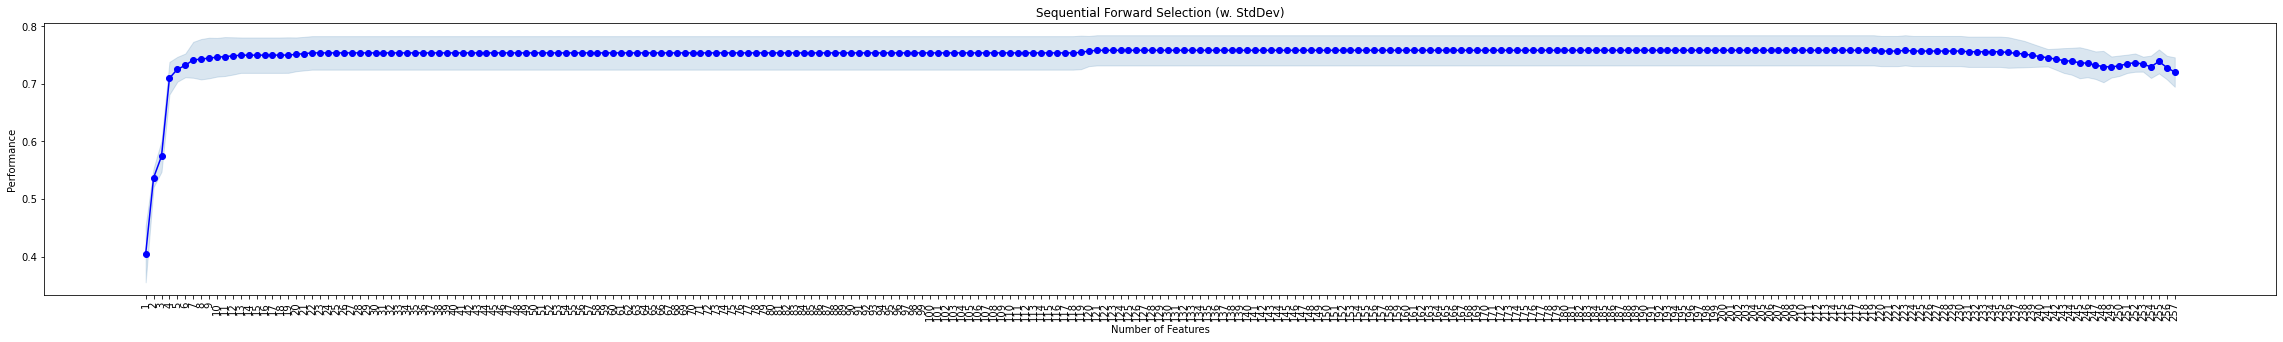

In [123]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(40, 5))

plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

We can see that from approx the 22nd feature the performance start to stay constant, hence let us create a new model with 20 variables only and display the top 20 features 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:    1.0s finished

[2022-02-25 15:57:31] Features: 1/22 -- score: 0.40456944185757754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    3.7s finished

[2022-02-25 15:57:35] Features: 2/22 -- score: 0.5370139749429014[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 255 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:    4.8s finished

[2022-02-25 15:57:40] Features: 3/22 -- score: 0.5743776563448694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=

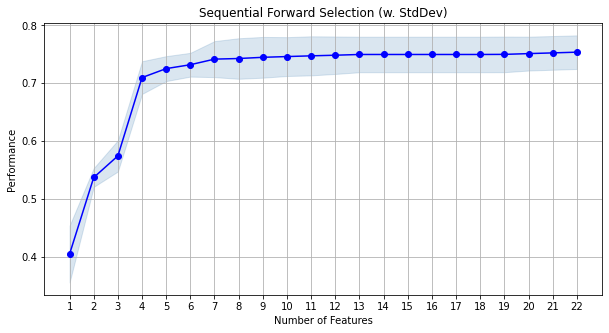

In [124]:
sfs1 = SFS(
    model,
    k_features=22,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(10, 5))

plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

Perfect! Now let us display the most important feature names.:


In [125]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
X_train.columns[feat_cols]

[2, 3, 6, 7, 9, 10, 11, 13, 14, 16, 18, 20, 23, 34, 42, 65, 100, 123, 149, 192, 206, 207]


Index(['Income', 'Family', 'Securities_Account', 'CD_Account', 'CreditCard',
       'Education_2', 'Education_3', 'City_Alamo', 'City_Albany',
       'City_Anaheim', 'City_Aptos', 'City_Arcata', 'City_Banning',
       'City_Brisbane', 'City_Cardiff By The Sea', 'City_Davis', 'City_Irvine',
       'City_Menlo Park', 'City_Oakland', 'City_San Jose',
       'City_Santa Barbara', 'City_Santa Clara'],
      dtype='object')

## Performance Evaluation of the Simpified model (variables = 22)

In [126]:
X_train_sfs = X_train[X_train.columns[feat_cols]]

# Creating new x_test with the same variables that we selected for x_train
X_test_sfs = X_test[X_train_sfs.columns]

# X_train_sfs = X_train.columns[X_train.columns[feat_cols]]
# X_test_sfs = X_test[X_train_sfs.columns]
print(f'''X_train shape:{X_train_sfs.shape}
Y_test shape:{X_test_sfs.shape}''')

X_train shape:(3500, 22)
Y_test shape:(1500, 22)


In [127]:
X_train_sfs

Income  Family  Securities_Account  CD_Account  CreditCard  Education_2  \
1334      35       2                   0           0           0            0   
4768      39       1                   0           0           0            1   
65       131       1                   0           0           1            0   
177       65       4                   0           0           0            1   
4489      21       3                   0           0           0            1   
...      ...     ...                 ...         ...         ...          ...   
2895      39       4                   0           0           0            1   
2763      13       4                   0           0           0            0   
905       28       1                   0           0           1            0   
3980      89       4                   0           0           0            1   
235       71       4                   0           0           0            0   

      Education_3  City_Alamo  City_Albany  City_Anaheim  City_Aptos  \
1334            0           0            0             0           0   
4768            0           0            0             0           0   
65              0           0            0             0           0   
177             0           0            0             0           0   
4489            0           0            0             0           0   
...           ...         ...          ...           ...         ...   
2895            0           0            0             0           0   
2763            0           0            0             0           0   
905             0           0            0             0           0   
3980            0           0            0             0           0   
235             1           0            0             0           0   

      City_Arcata  City_Banning  City_Brisbane  City_Cardiff By The Sea  \
1334            0             0              0                        0   
4768            0             0              0                        0   
65              0             0              0                        0   
177             0             0              0                        0   
4489            1             0              0                        0   
...           ...           ...            ...                      ...   
2895            0             0              0                        0   
2763            0             0              0                        0   
905             0             0              0                        0   
3980            0             0              0                        0   
235             0             0              0                        0   

      City_Davis  City_Irvine  City_Menlo Park  City_Oakland  City_San Jose  \
1334           0            0                0             0              0   
4768           0            0                0             0              0   
65             0            0                0             0              0   
177            0            0                0             0              0   
4489           0            0                0             0              0   
...          ...          ...              ...           ...            ...   
2895           0            0                0             0              0   
2763           0            0                0             0              0   
905            0            0                0             0              0   
3980           0            0                0             0              0   
235            0            0                0             0              0   

      City_Santa Barbara  City_Santa Clara  
1334                   0                 0  
4768                   0                 0  
65                     0                 0  
177                    0                 0  
4489                   0                 0  
...                  ...               ...  
289

In [128]:
# Fitting logistic regession model

log_sfs = LogisticRegression(
    solver="newton-cg", penalty="none", verbose=True, n_jobs=-1, random_state=1
)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge

log_sfs.fit(X_train_sfs, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(n_jobs=-1, penalty='none', random_state=1,
                   solver='newton-cg', verbose=True)

### Let's Look at model performance

* On training set

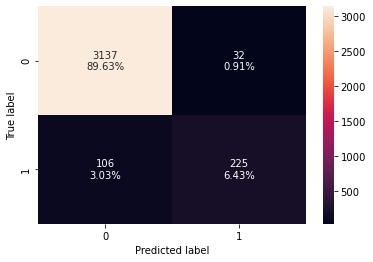

In [129]:
confusion_matrix_sklearn_with_threshold(log_sfs, X_train_sfs, y_train)

In [130]:
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_train_sfs, y_train
)
print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


Accuracy    Recall  Precision        F1
0  0.960571  0.679758   0.875486  0.765306

* On test set

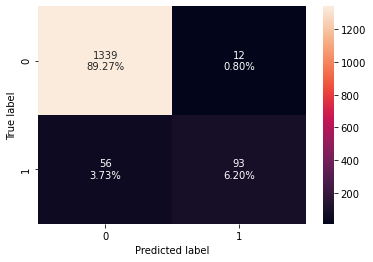

In [131]:
confusion_matrix_sklearn_with_threshold(log_sfs, X_test_sfs, y_test)

In [132]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_test_sfs, y_test
)
print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


Accuracy    Recall  Precision        F1
0  0.954667  0.624161   0.885714  0.732283

The Recall is much less than after applying the feature selection with the default threshold 0.5 , hence we will derive another model with a threshold 0.1 and observe its performance

In [136]:
log_reg_model_train_perf_SFS_tre = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_train_sfs, y_train,  threshold=0.1
)
print("Training performance:")
log_reg_model_train_perf_SFS_tre

Training performance:


Accuracy    Recall  Precision        F1
0     0.906  0.873112   0.501736  0.637266

In [137]:
log_reg_model_test_perf_SFS_tre = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_test_sfs, y_test, threshold=0.1
)

print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


Accuracy    Recall  Precision        F1
0  0.954667  0.624161   0.885714  0.732283

The Recall of the train and test sets are highly mismatched, where recall train = 0.87 and recall test = 0.62

## Logistic Regression Models Comparison:

|Sr|Model name| train_performance |recall (train) |test_performance |recall(test)| threshold | no. of variables|
|:--:|:---------|:--------------------|:---------------|:------------|:------------:|:------------:|:------------:|
|1|lg|log_reg_model_train_perf|0.6798|log_reg_model_test_perf|0.6242| 0.5 |257|
|2|lg|log_reg_model_train_perf_threshold_auc_roc|0.8761|log_reg_model_test_perf_threshold_auc_roc|0.7919|0.187|257|
|3|lg|log_reg_model_train_perf_threshold_curve|0.9154|log_reg_model_test_perf_threshold_curve|0.8792|0.10|257|
|4|log_sfs|log_reg_model_train_perf_SFS|0.6798|log_reg_model_test_perf_SFS|0.6241|0.5|22|
|5|log_sfs|log_reg_model_train_perf_SFS_tre|0.8731|log_reg_model_test_perf_SFS_tre|0.6242|0.1|22|


Observation:
- The best performing model is **Model_3** lg model tuned to a **threshold of 0.1** and uses **257 variables**

Conclusion:
- The very low threshold yielding a good model predictibility is explained by the very low percentage of class 1 customers (who accept personal loan) in the original data set.
- This model will be used in the final comparison between Decision tree models


# Model building
## 2. Decision Tree

In addition to using the : The **get_recall_score** and **make_confusion_matrix** functions, we will define the function **plot_tree** to plot the decision trees for the models under study

In [138]:
#function to plot a decision tree
def plot_tree(model, Predictor):
    feature_names = Predictor.columns.to_list()
    plt.figure(figsize=(20, 30))
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

### Building the original tree $T_0$

The starting point is building the original full tree model with the default hyperparameters and observe:
- Model performance
- Variables importance
- Model Improvement strategy 

Yet, It was noted that the frequence of classes in training set is:

|Class|Frequence|
|:---:|:-----:|
|0|0.905429|
|1|0.094571|  

To avoid ending up with a bias model, we should balance the class weights (using the class_weight hyperparamater) in the decision tree classifer.

In [139]:
#creating the decission tree model
t_0 = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

In [140]:
#fitting the training data
t_0.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model performance Evaluation of $T_0$

In [141]:
#Calculating the Recall for train and test data
Recall_Train_T_0 = get_recall_score(t_0, X_train, y_train)
print(f'Recall for T_0 on Train Data = {Recall_Train_T_0}')
Recall_Test_T_0 = get_recall_score(t_0, X_test, y_test)
print(f'Recall for T_0 on Test Data = {Recall_Test_T_0}')

Recall for T_0 on Train Data = 1.0
Recall for T_0 on Test Data = 0.8859060402684564


A quiet big mismatch is observed between train and test sets performance, hence it is assumed that the T_0 model is overfitting the data.
let us observe further the confusion matrix and the tree structure.

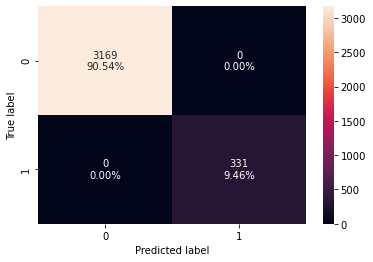

In [142]:
confusion_matrix_sklearn(t_0, X_train, y_train)

As assumed, the model is perfectly overfitting the data as observed from the confusion matric the FN & FP are 0%

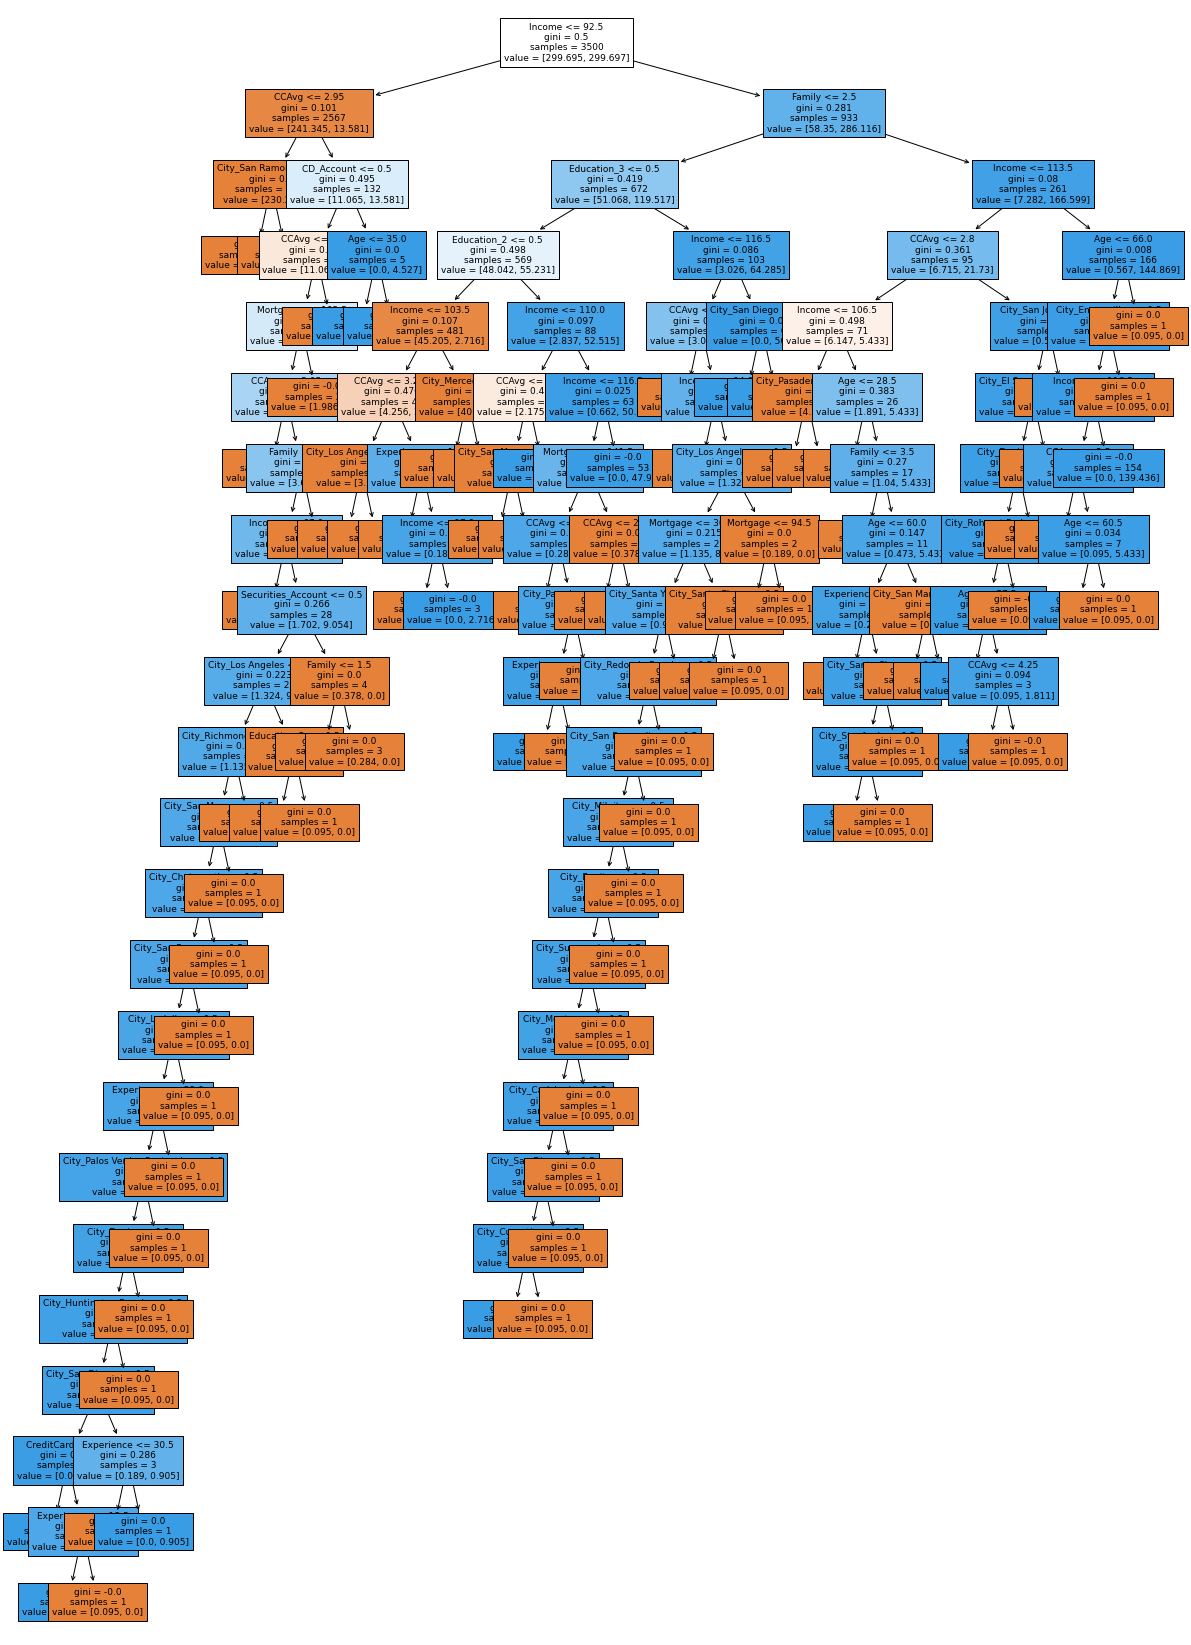

In [143]:
#plotting the tree
plot_tree(t_0,X_train)

- The original tree $T_0$ is quiet complicated and is overfitting the training data set, hence pre-prunning and post proning are to be considered to improve the model performance.
- One very interesting observation still on $T_0$ is that the first split was on the "Income" variable, hence let us observe first how the variable importances look like

In [144]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

def view_nd_plot_importance(model, predictors):
    print("The features importances:")
    print(
        pd.DataFrame(
            model.feature_importances_, columns=["Imp"], index=predictors.columns
        ).sort_values(by="Imp", ascending=False)
    )

    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 65))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [predictors.columns[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

The features importances:
                     Imp
Income          0.634087
Education_2     0.136399
CCAvg           0.090608
Education_3     0.048025
Family          0.045608
...                  ...
City_Inglewood  0.000000
City_Irvine     0.000000
City_La Mesa    0.000000
City_La Mirada  0.000000
State_CA        0.000000

[257 rows x 1 columns]


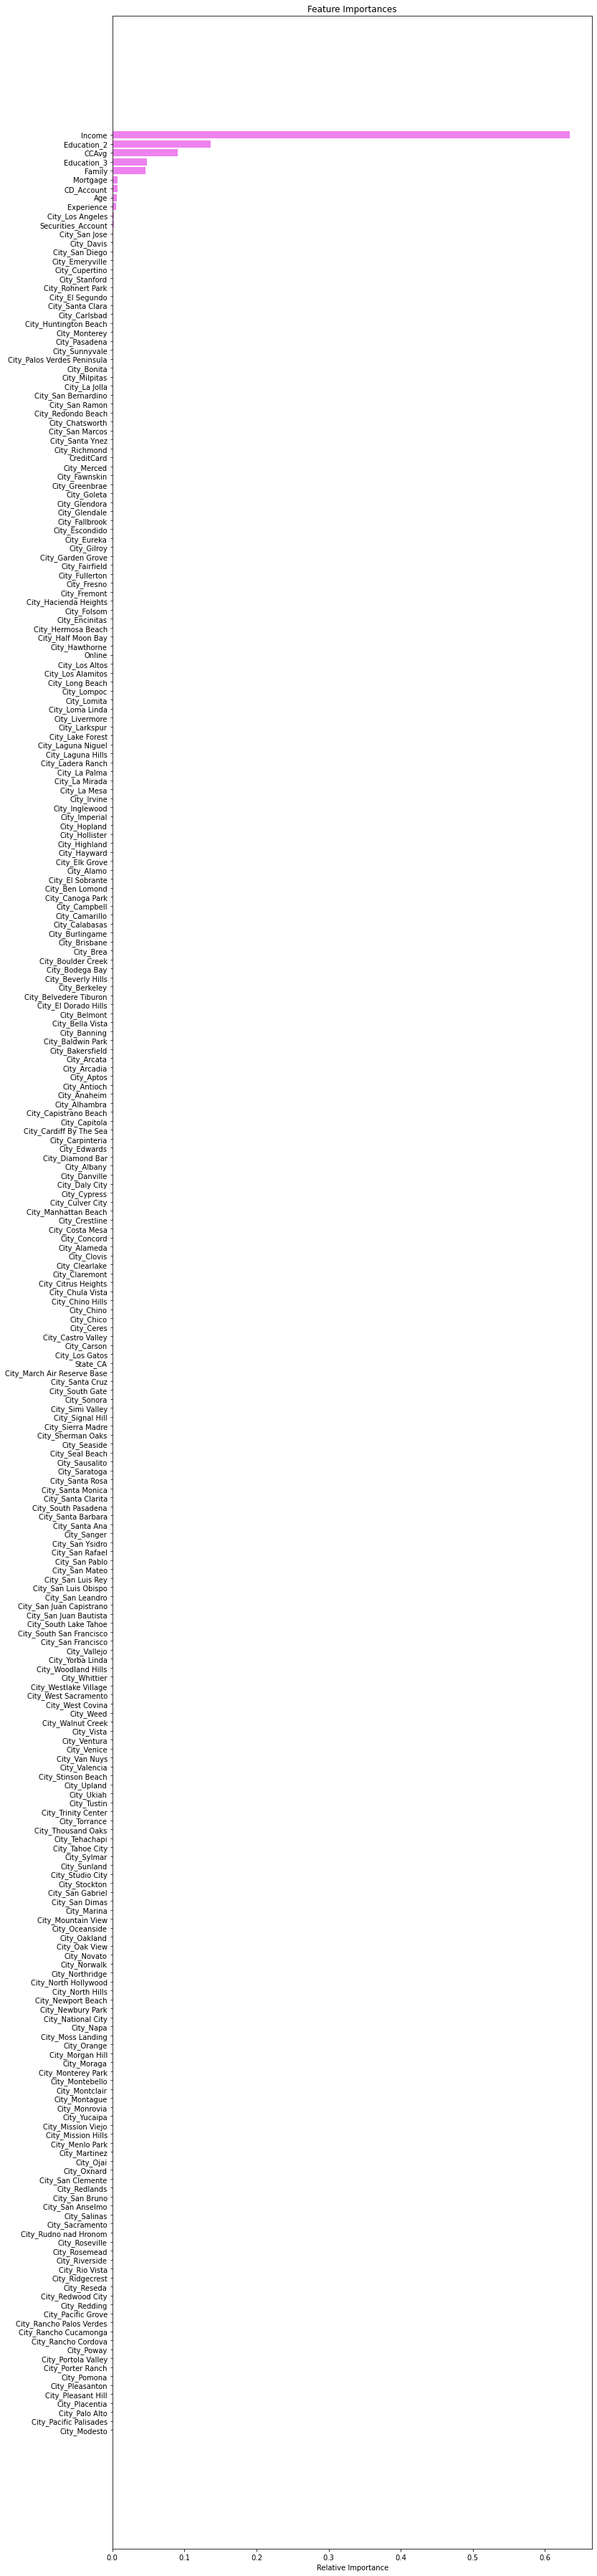

In [145]:
view_nd_plot_importance(t_0, X_train)

- It is observed that the top importance variable is Income and the least importance are the cities (except for Los Angles that contributes slightly to the model predictibility)
- The top 5 variables are :
    - Income          
    - Education_2     
    - CCAvg           
    - Education_3     
    - Family          

## Model performance improvement

### 1. Pre-prunning via hyperparameter tuning 
The approach is: applying GridSearch to compute the optimum hyperparameter values


In [146]:
#let us get the max depth of T_0 to have an idea how to tune our parameters
print(f'''The max depth of the t_0 =  {t_0.tree_.max_depth}
The node_count ={t_0.tree_.node_count}
The number of leaves = {t_0.tree_.n_leaves}''')

The max depth of the t_0 =  22
The node_count =171
The number of leaves = 86


In [147]:
# Choose the type of classifier.
t_grid = DecisionTreeClassifier(random_state=1, class_weight={0: 0.094571, 1: 0.905429})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, 20, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'max_leaf_nodes' : [2, 3, 5, 10],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(t_grid, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
t_grid = grid_obj.best_estimator_

# Fit the best algorithm to the data.
t_grid.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=1)

### Applying the tuned hyperparamaters to derive T_1

Plugging in the hyper parameters:
- max_depth = 5
- Criteroion = Entropy
- remaining paramaters : Keep as default

In [148]:
# Choose the type of classifier.
t_1 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429})

In [149]:
t_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, random_state=1)

### Model Performance Evaluation_Pre-pruned Tree $T_1$

In [150]:
Recall_Train_T_1 = get_recall_score(t_1, X_train, y_train)
print(f'Recall for T_1 on Train Data = {Recall_Train_T_1}')
Recall_Test_T_1 = get_recall_score(t_1, X_test, y_test)
print(f'Recall for T_1 on Test Data = {Recall_Test_T_1}')

Recall for T_1 on Train Data = 0.9909365558912386
Recall for T_1 on Test Data = 0.9530201342281879


Displaying the tree, the confucion matrix and variables importance

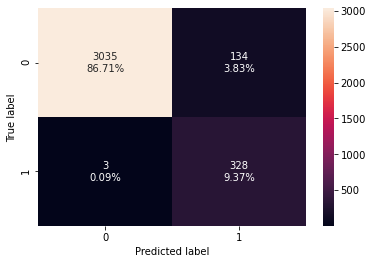

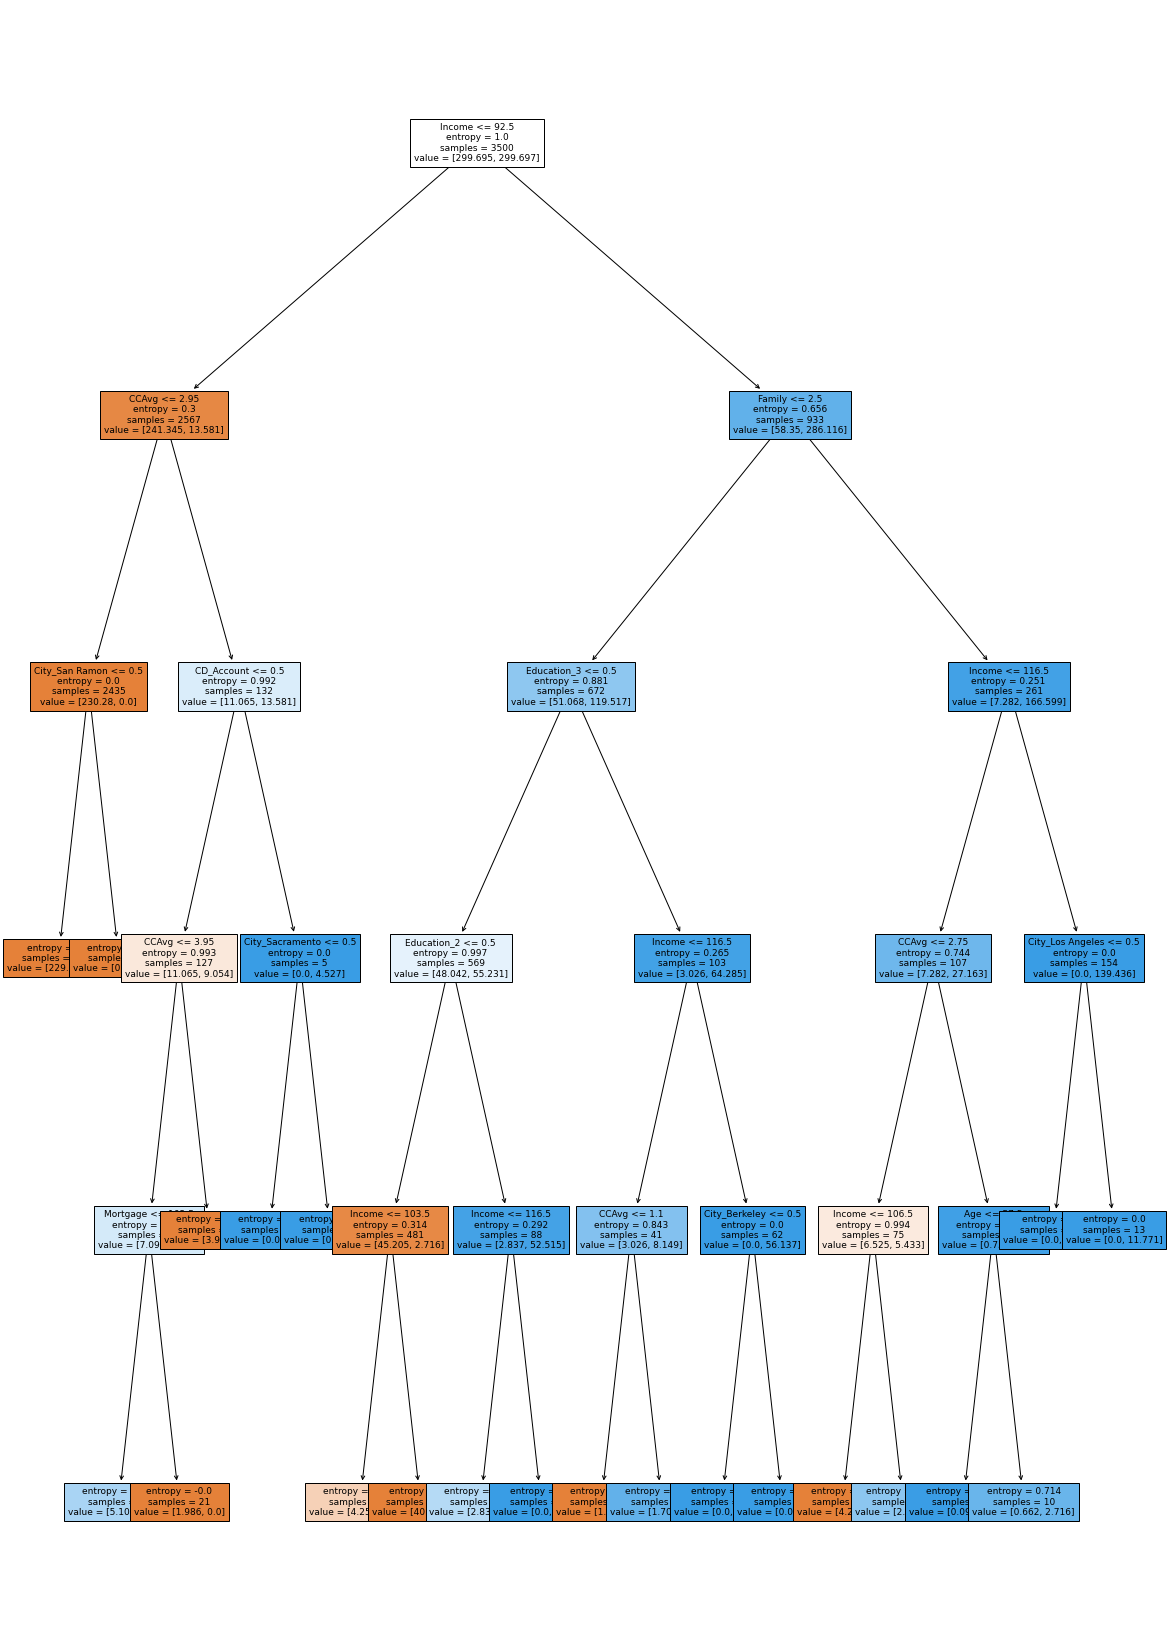

The features importances:
                            Imp
Income                 0.622152
Education_2            0.129053
CCAvg                  0.122196
Family                 0.058051
Education_3            0.053056
...                         ...
City_Hollister         0.000000
City_Hopland           0.000000
City_Huntington Beach  0.000000
City_Imperial          0.000000
State_CA               0.000000

[257 rows x 1 columns]


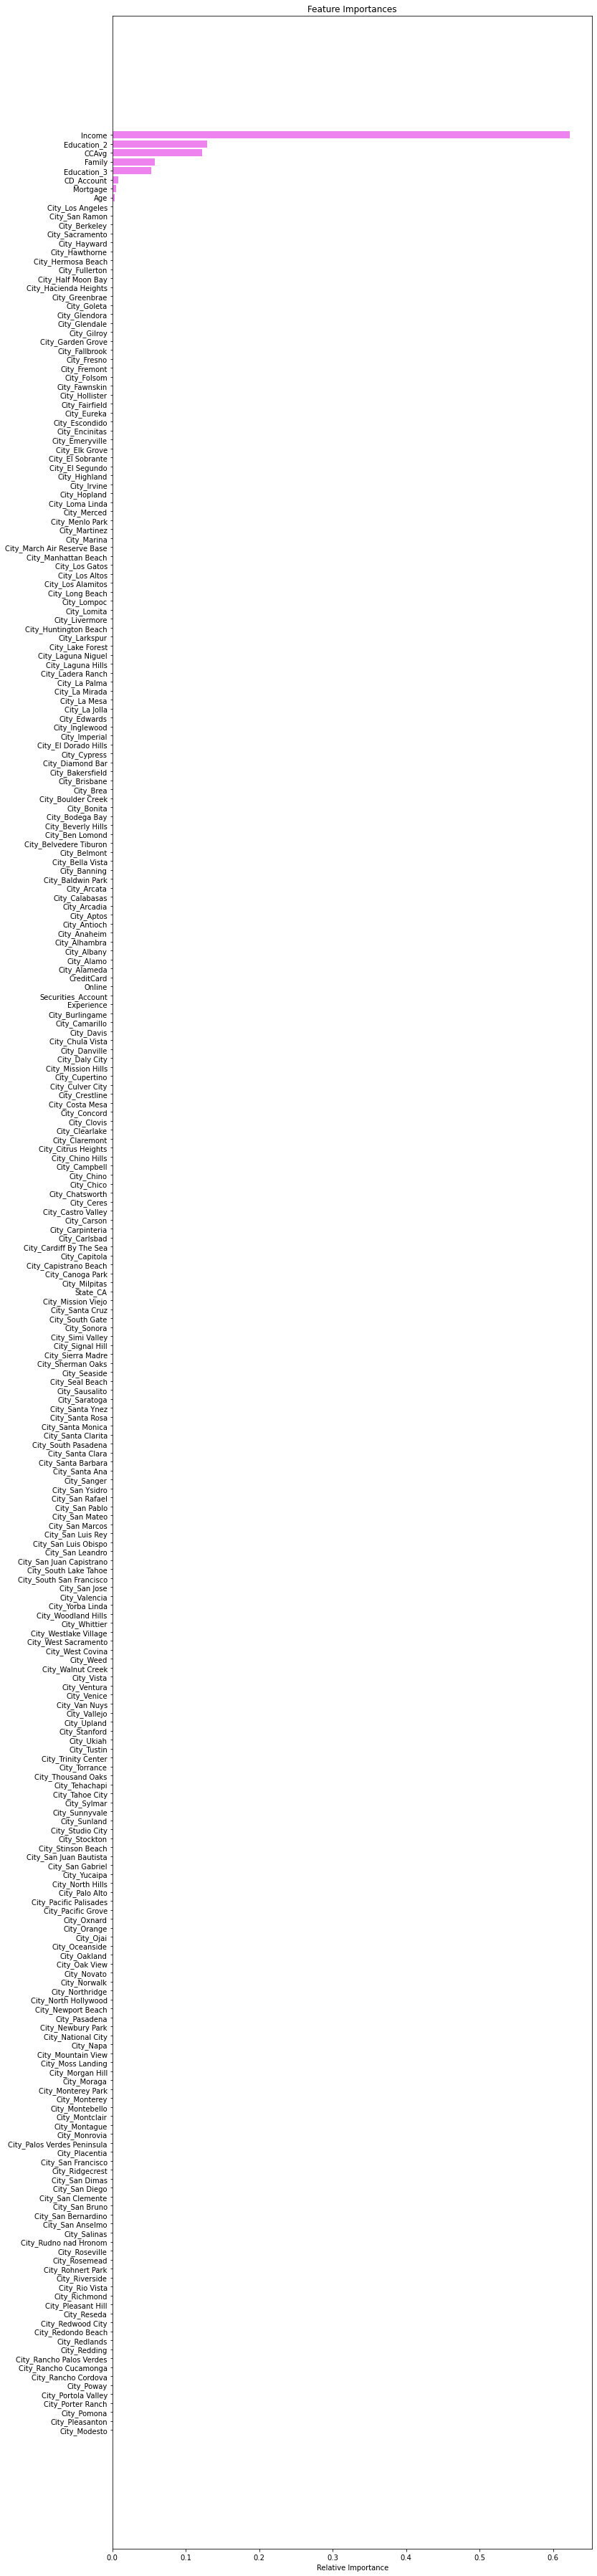

In [151]:
confusion_matrix_sklearn(t_1, X_train, y_train)
plot_tree(t_1,X_train)
view_nd_plot_importance(t_1, X_train)

### **Observation**

- At **max_depth=5. criterion= entropy and  default values for the remaining hyperparameters** the model performance on the **test set** is better than at **$T_0$** at max_depth= None criterion = gini

- Recall values:
    - Recall for T_1 on Train Data = 0.9909365558912386
    - Recall for T_1 on Test Data = 0.9530201342281879
- Features with max importance:
    - Income                         6.221524e-01
    - Education_2                    1.290525e-01
- Less importance yet still having a predictibily effect:
    - CCAvg                          1.221962e-01
    - Family                         5.805141e-02
    - Education_3                    5.305620e-02
-Confusion matrix:
    - FN at 0.09%
    - FP at 3.83%


### Tuning further hyperparameters to derive model $T_2$

In [152]:
#Choose the type of classifier.
t_2 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429},max_leaf_nodes=3,
                       min_impurity_decrease=1e-05)

In [153]:
t_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=1)

### Model Performance Evaluation_Pre-pruned Tree $T_2$

In [155]:
Recall_Train_T_2 = get_recall_score(t_2, X_train, y_train)
print(f'Recall for T_2 on Train Data = {Recall_Train_T_1}')
Recall_Test_T_1 = get_recall_score(t_2, X_test, y_test)
print(f'Recall for T_2 on Test Data = {Recall_Test_T_1}')

Recall for T_2 on Train Data = 0.9909365558912386
Recall for T_2 on Test Data = 1.0


The model seems to overfit the test data, hence it is not to be neglected

## Decision Tree Models Comparison (pre-pruning)

|Model name| train_performance |recall (train) |test_performance |recall(test)| Depth |Criterion|Other hyperparameters|
|:---------|:--------------------|:---------------|:------------|:------------:|:------------:|:------------:|:------------:|
|t_0|Recall_Train_T_0|1.0|Recall_Test_T_0|0.8859| None |Gini| Default|
|t_0|Recall_Train_T_1|0.9909|Recall_Test_T_1|0.9531|5 |Entropy|Default|
|t_2|Recall_Train_T_2|0.99|Recall_Test_T_2|1.0|5 |Entropy|max_leaf_nodes=3 & min_impurity_decrease=1e-05 |

   
### **Conclusion of Pre-prunning**
- The best performing model on the test set is <font color=green> **$T_1$** </font> with the below hyperparameters:
|Hyper parameter|Value|
|:--|:--:|
|criterion|entropy|
|max_depth|5|
|class_weight|{0: 0.094571, 1: 0.905429}|
|Others|Default Values

The feature importance of this model is:
- Features with max importance:
    - Income                         6.221524e-01
    - Education_2                    1.290525e-01
- Less importance yet still having a predictibily effect:
    - CCAvg                          1.221962e-01
    - Family                         5.805141e-02
    - Education_3                    5.305620e-02
    
#### <font color=green> End of Pre-prunning </font>


### Post Prunning

In [156]:
#defining the classifier
PP_t_0 = DecisionTreeClassifier(random_state=1, class_weight={0: 0.094571, 1: 0.905429})

#defining the cost complexity pryning path
path = PP_t_0.cost_complexity_pruning_path(X_train, y_train)

#Extracting the ccp_aplhas and impurities from the path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [157]:
#displaying the ccp_alphas VS the impurities to prove that as the alphase increas the impurities increase 
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -4.350045e-16
1   1.156114e-18 -4.338484e-16
2   1.541486e-18 -4.323069e-16
3   1.541486e-18 -4.307654e-16
4   1.541486e-18 -4.292239e-16
5   2.452364e-18 -4.267715e-16
6   3.082972e-18 -4.236886e-16
7   8.863544e-18 -4.148250e-16
8   1.418868e-17 -4.006363e-16
9   1.471418e-17 -3.859222e-16
10  2.851033e-17 -3.574118e-16
11  9.101774e-17 -2.663941e-16
12  9.358097e-17 -1.728131e-16
13  4.265362e-16  2.537231e-16
14  1.559680e-04  3.119360e-04
15  1.568678e-04  6.256717e-04
16  2.775440e-04  3.678655e-03
17  2.827427e-04  6.506082e-03
18  2.857137e-04  7.363223e-03
19  2.998944e-04  8.262906e-03
20  3.066188e-04  9.182763e-03
21  3.101569e-04  9.492920e-03
22  3.939483e-04  1.106871e-02
23  4.864491e-04  1.204161e-02
24  4.892742e-04  1.253089e-02
25  5.517629e-04  1.308265e-02
26  5.900272e-04  1.367268e-02
27  5.960439e-04  1.426872e-02
28  6.616421e-04  1.559200e-02
29  7.538156e-04  1.634582e-02
30  8.981795e-04  1.724400e-02
31  9.269284e-04  1.817093e-02
32  1.461813e-03  1.963274e-02
33  1.671122e-03  2.130386e-02
34  1.768018e-03  2.307188e-02
35  2.221376e-03  2.751463e-02
36  2.375812e-03  2.989044e-02
37  2.472653e-03  3.483575e-02
38  3.297255e-03  3.813301e-02
39  3.344501e-03  4.147751e-02
40  3.503779e-03  4.498129e-02
41  3.602943e-03  5.218717e-02
42  3.729680e-03  5.591685e-02
43  4.941464e-03  6.085831e-02
44  4.970964e-03  7.080024e-02
45  2.255802e-02  9.335827e-02
46  3.708743e-02  2.046206e-01
47  2.953794e-01  5.000000e-01

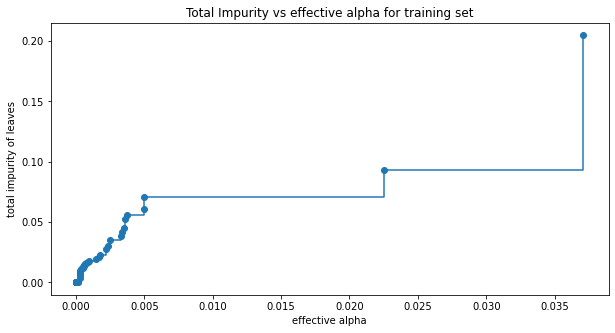

In [158]:
#let us plot the alphas VS the impurities
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

It is observed that the impurities show a sdeen peak after alpha = approx.0.005

Let us start training the decision tree using the effective alphas and observe how the tree depth vary with alpha

In [159]:
#an emplty list of post pruned trees (PP_trees)

PP_trees = []
for alpha in ccp_alphas:
    PP_tree = DecisionTreeClassifier(
        random_state=1, ccp_alpha=alpha, class_weight={0: 0.094571, 1: 0.905429}
    )
    PP_tree.fit(X_train, y_train)
    PP_trees.append(PP_tree)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        PP_trees[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953794476658226


We will Remove the last elements in PP_trees and CCP_alphas as they relfect the smallest tree (one node) and proceed with the visualtization of the nodes and depth (i.e tree complexity) as alpha varies

In [160]:
PP_trees = PP_trees[:-1]
ccp_alphas = ccp_alphas[:-1]

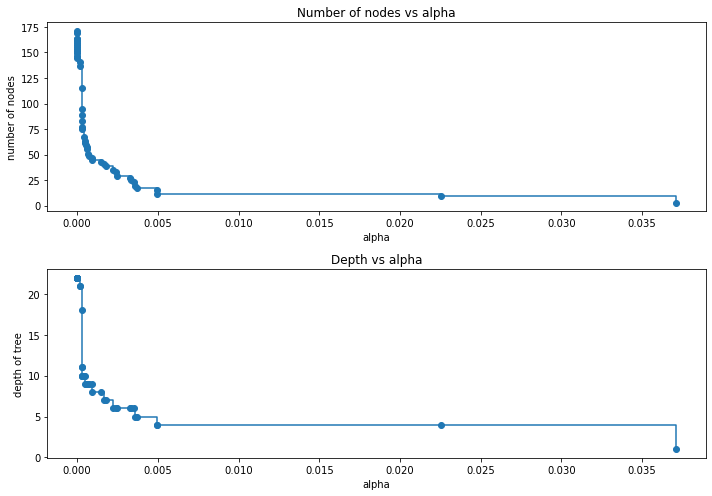

In [161]:
node_counts = [PP_tree.tree_.node_count for PP_tree in PP_trees]
depth = [PP_tree.tree_.max_depth for PP_tree in PP_trees]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

It is observed that again at alpha = 0.005 the tree seems to have reached the smallest size which is underfitting the data. Hence, we now have an idea that the **alpha value that will give us the optimum model performance is definitely below 0.05**

Now, let us observe how the Model recall values at varying alphas for the training and test sets

In [162]:
#derive the recall values for all PP_tress for the train set
recall_train = []
for PP_tree in PP_trees:
    y_pred_train = PP_tree.predict(X_train)
    values_train = recall_score(y_train, y_pred_train)
    recall_train.append(values_train)

In [163]:
#derive the recall values for all PP_tress for the test set
recall_test = []
for PP_tree in PP_trees:
    y_pred_test = PP_tree.predict(X_test)
    values_test = recall_score(y_test, y_pred_test)
    recall_test.append(values_test)

In [164]:
#calculating the Accuracy of test and train models
train_scores = [PP_tree.score(X_train, y_train) for PP_tree in PP_trees]
test_scores = [PP_tree.score(X_test, y_test) for PP_tree in PP_trees]

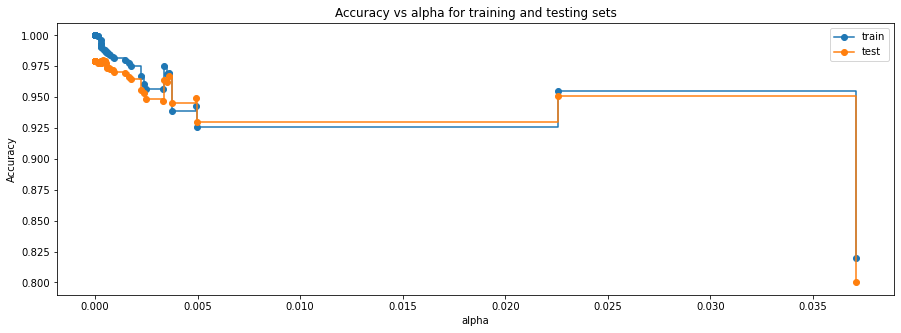

In [165]:
#plotting the accuracy for test and training sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Again, we observe a better performance at alpha less than 0.05. Visually the value of alpha giving the best accuract is either very close to zero which could be still reflecting an over fitting tree, the other option is at approx 0.03 or 0.035. Still, the accuracy is not the optimum performance measure we are pursuing, we are to pursue the best Recall value as a performance measure

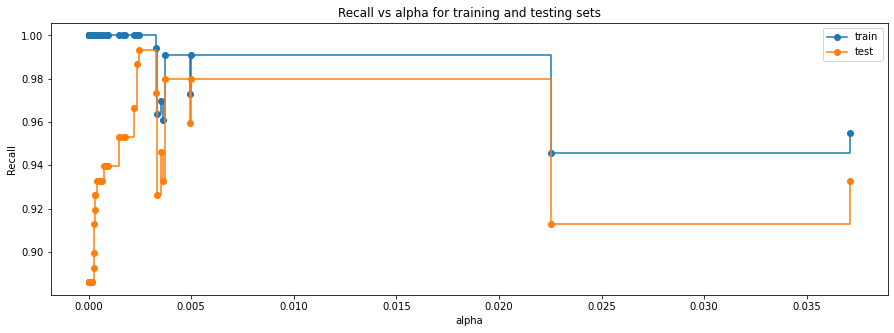

In [166]:
#plotting the recall scores for test and training sets VS Alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [167]:
#let us derive the minimum alpha value for the test test
index_best_model = np.argmax(recall_test)
print(f''' The recall value giving the best predictibility model is: {recall_test[index_best_model]}
"The best alpha value is: {ccp_alphas[index_best_model]}"''')

 The recall value giving the best predictibility model is: 0.9932885906040269
"The best alpha value is: 0.002472652743953624"


Deriving the best model **PP_t_best** and fitting it to the train set

In [168]:
PP_t_best_1 = PP_trees[index_best_model]
PP_t_best_1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002472652743953624,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model Performance Evaluation_Post-pruned Tree 

In [169]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_1 = get_recall_score(PP_t_best_1, X_train, y_train)
print(f'Recall for PP_t_best_1 on Train Data = {Recall_Train_PP_t_best_1}')

Recall_Test_PP_t_best_1 = get_recall_score(PP_t_best_1, X_test, y_test)
print(f'Recall for PP_t_best_1 on Test Data = {Recall_Test_PP_t_best_1}')

Recall for PP_t_best_1 on Train Data = 1.0
Recall for PP_t_best_1 on Test Data = 0.9932885906040269


The Recall on train data sets is 1.0 which raises the suspicion of an overfitting model, yet its value is closer to the recall of the test dataset which is still better than t_0, yer requires further improvement.
Hence, we will derive the tree, decision table and feature importantce for this model **PP_t_best_1** and then derive another model of the second peak of alpha.

The tree depth is : 6


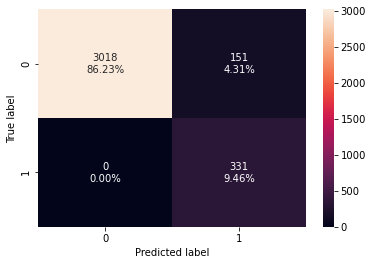

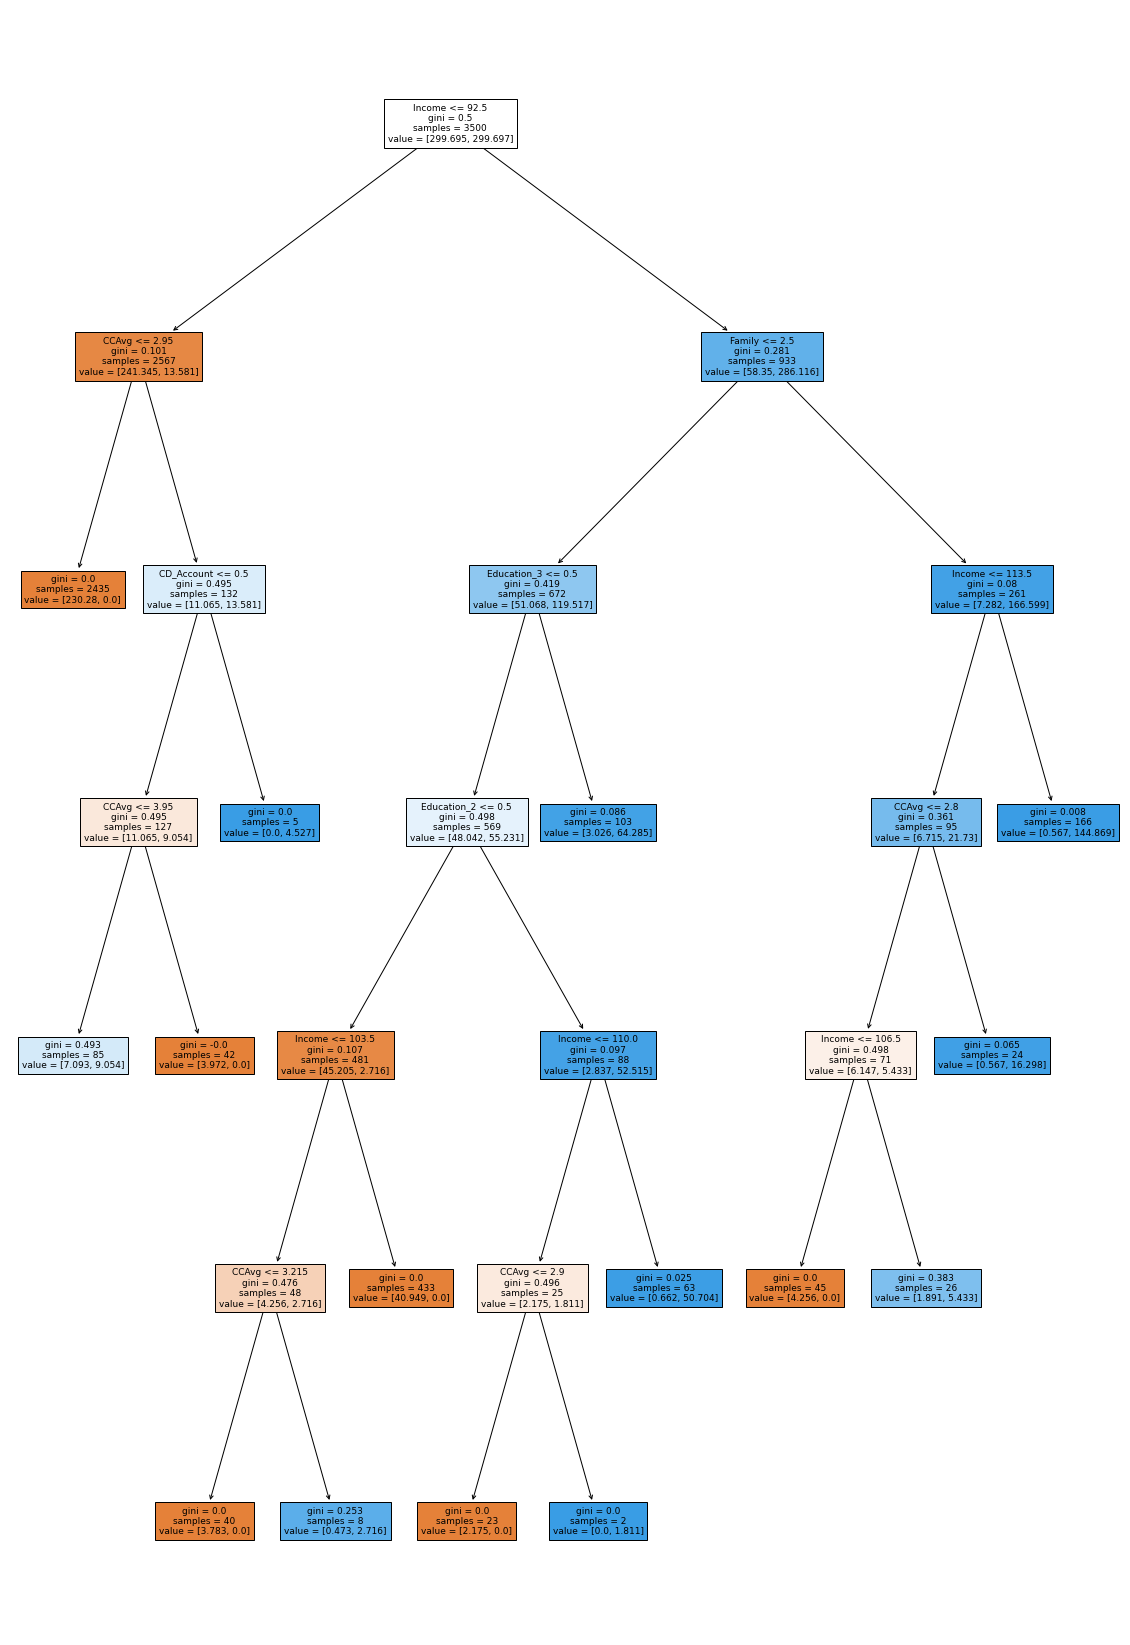

The features importances:
                            Imp
Income                 0.668840
Education_2            0.146614
CCAvg                  0.083952
Education_3            0.051622
Family                 0.040953
...                         ...
City_Highland          0.000000
City_Hollister         0.000000
City_Hopland           0.000000
City_Huntington Beach  0.000000
State_CA               0.000000

[257 rows x 1 columns]


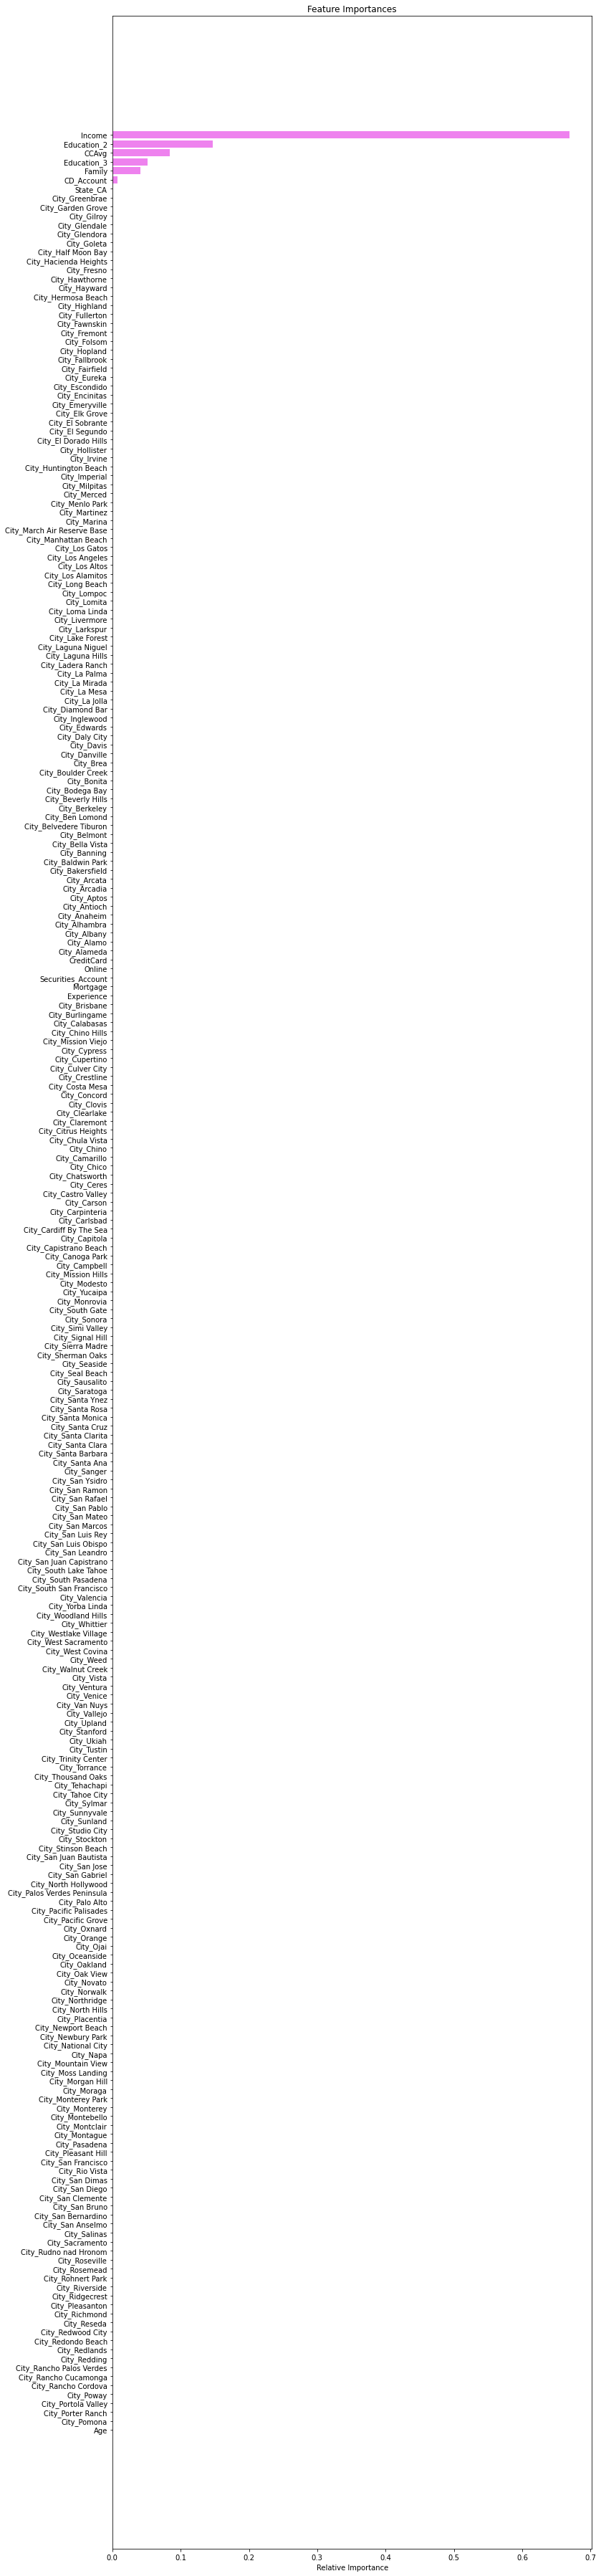

In [171]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_1.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_1, X_train, y_train)
plot_tree(PP_t_best_1,X_train)
view_nd_plot_importance(PP_t_best_1, X_train)

### Observation on PP_t_best_1 Model 

- At **ccp_alpha=0.00247265274395358 and max_depth=6** the performance summary is:

- Recall values:
    - Recall for PP_t_best_1 on Train Data = 1.0
    - Recall for PP_t_best_1 on Test Data = 0.9932885906040269
- Features with max importance:
    - Income                         
    - Education_2                    
- Less importance yet still having a predictibily effect:
    - CCAvg                          
    - Education_3                    
    - Family                        

- Confusion matrix:
    - FN at 0.00% (*Not realistic*)
    - FP at 4.31%


## Further model enhancement by deriving PP_t_best_2 Model
Earlier when we viewed the Recall_test and Recall_train VS the alpha, it was noticed another meeting point at an alpha near value of approx 0.03. Hence, our approach to avoid using an overfitting model is to extract a higher alpha that still gives a very good Recall value for the test set.

In [172]:
#creating a data frame including alpha, recall train and recall test
df = pd.DataFrame()
df[['ccp_alphas', 'recall_train', 'recall_test']]=''
df['ccp_alphas']=ccp_alphas
df['recall_train']= recall_train
df['recall_test']=recall_test
df

ccp_alphas  recall_train  recall_test
0   0.000000e+00      1.000000     0.885906
1   1.156114e-18      1.000000     0.885906
2   1.541486e-18      1.000000     0.885906
3   1.541486e-18      1.000000     0.885906
4   1.541486e-18      1.000000     0.885906
5   2.452364e-18      1.000000     0.885906
6   3.082972e-18      1.000000     0.885906
7   8.863544e-18      1.000000     0.885906
8   1.418868e-17      1.000000     0.885906
9   1.471418e-17      1.000000     0.885906
10  2.851033e-17      1.000000     0.885906
11  9.101774e-17      1.000000     0.885906
12  9.358097e-17      1.000000     0.885906
13  4.265362e-16      1.000000     0.885906
14  1.559680e-04      1.000000     0.885906
15  1.568678e-04      1.000000     0.885906
16  2.775440e-04      1.000000     0.892617
17  2.827427e-04      1.000000     0.899329
18  2.857137e-04      1.000000     0.912752
19  2.998944e-04      1.000000     0.919463
20  3.066188e-04      1.000000     0.926174
21  3.101569e-04      1.000000     0.926174
22  3.939483e-04      1.000000     0.932886
23  4.864491e-04      1.000000     0.932886
24  4.892742e-04      1.000000     0.932886
25  5.517629e-04      1.000000     0.932886
26  5.900272e-04      1.000000     0.932886
27  5.960439e-04      1.000000     0.932886
28  6.616421e-04      1.000000     0.932886
29  7.538156e-04      1.000000     0.939597
30  8.981795e-04      1.000000     0.939597
31  9.269284e-04      1.000000     0.939597
32  1.461813e-03      1.000000     0.953020
33  1.671122e-03      1.000000     0.953020
34  1.768018e-03      1.000000     0.953020
35  2.221376e-03      1.000000     0.966443
36  2.375812e-03      1.000000     0.986577
37  2.472653e-03      1.000000     0.993289
38  3.297255e-03      0.993958     0.973154
39  3.344501e-03      0.963746     0.926174
40  3.503779e-03      0.969789     0.946309
41  3.602943e-03      0.960725     0.932886
42  3.729680e-03      0.990937     0.979866
43  4.941464e-03      0.972810     0.959732
44  4.970964e-03      0.990937     0.979866
45  2.255802e-02      0.945619     0.912752
46  3.708743e-02      0.954683     0.932886

At row 42 it is noticed good recall values for train and test sets at a value of alpha near the 0.003 threshold noticed on the curve. This value seems a good fit as it is not too close to an underfitting model, hence we will extract this value and observe how it behaves on the tree and confusion matrix

In [173]:
df.iloc[42]

ccp_alphas      0.003730
recall_train    0.990937
recall_test     0.979866
Name: 42, dtype: float64

In [174]:
#extracting the model from the 42nd model and fitting it to train and test data
PP_t_best_2 = PP_trees[42]
PP_t_best_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0037296801618502892,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model Performance Evaluation of Post-pruned Tree *PP_t_best_2*

In [175]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_2 = get_recall_score(PP_t_best_2, X_train, y_train)
print(f'Recall for PP_t_best_2 on Train Data = {Recall_Train_PP_t_best_2}')

Recall_Test_PP_t_best_2 = get_recall_score(PP_t_best_2, X_test, y_test)
print(f'Recall for PP_t_best_2 on Test Data = {get_recall_score(PP_t_best_2, X_test, y_test)}')

Recall for PP_t_best_2 on Train Data = 0.9909365558912386
Recall for PP_t_best_2 on Test Data = 0.9798657718120806


The Recall on test and train data sets are the same as stated in the dataframe df which was expected, let us move forward to visualizing the tree, the confusion matrix and feature importance

The tree depth is : 5


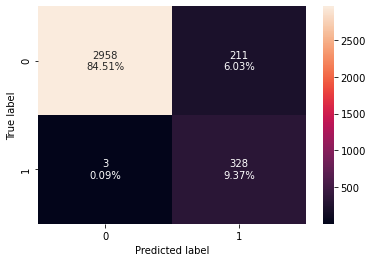

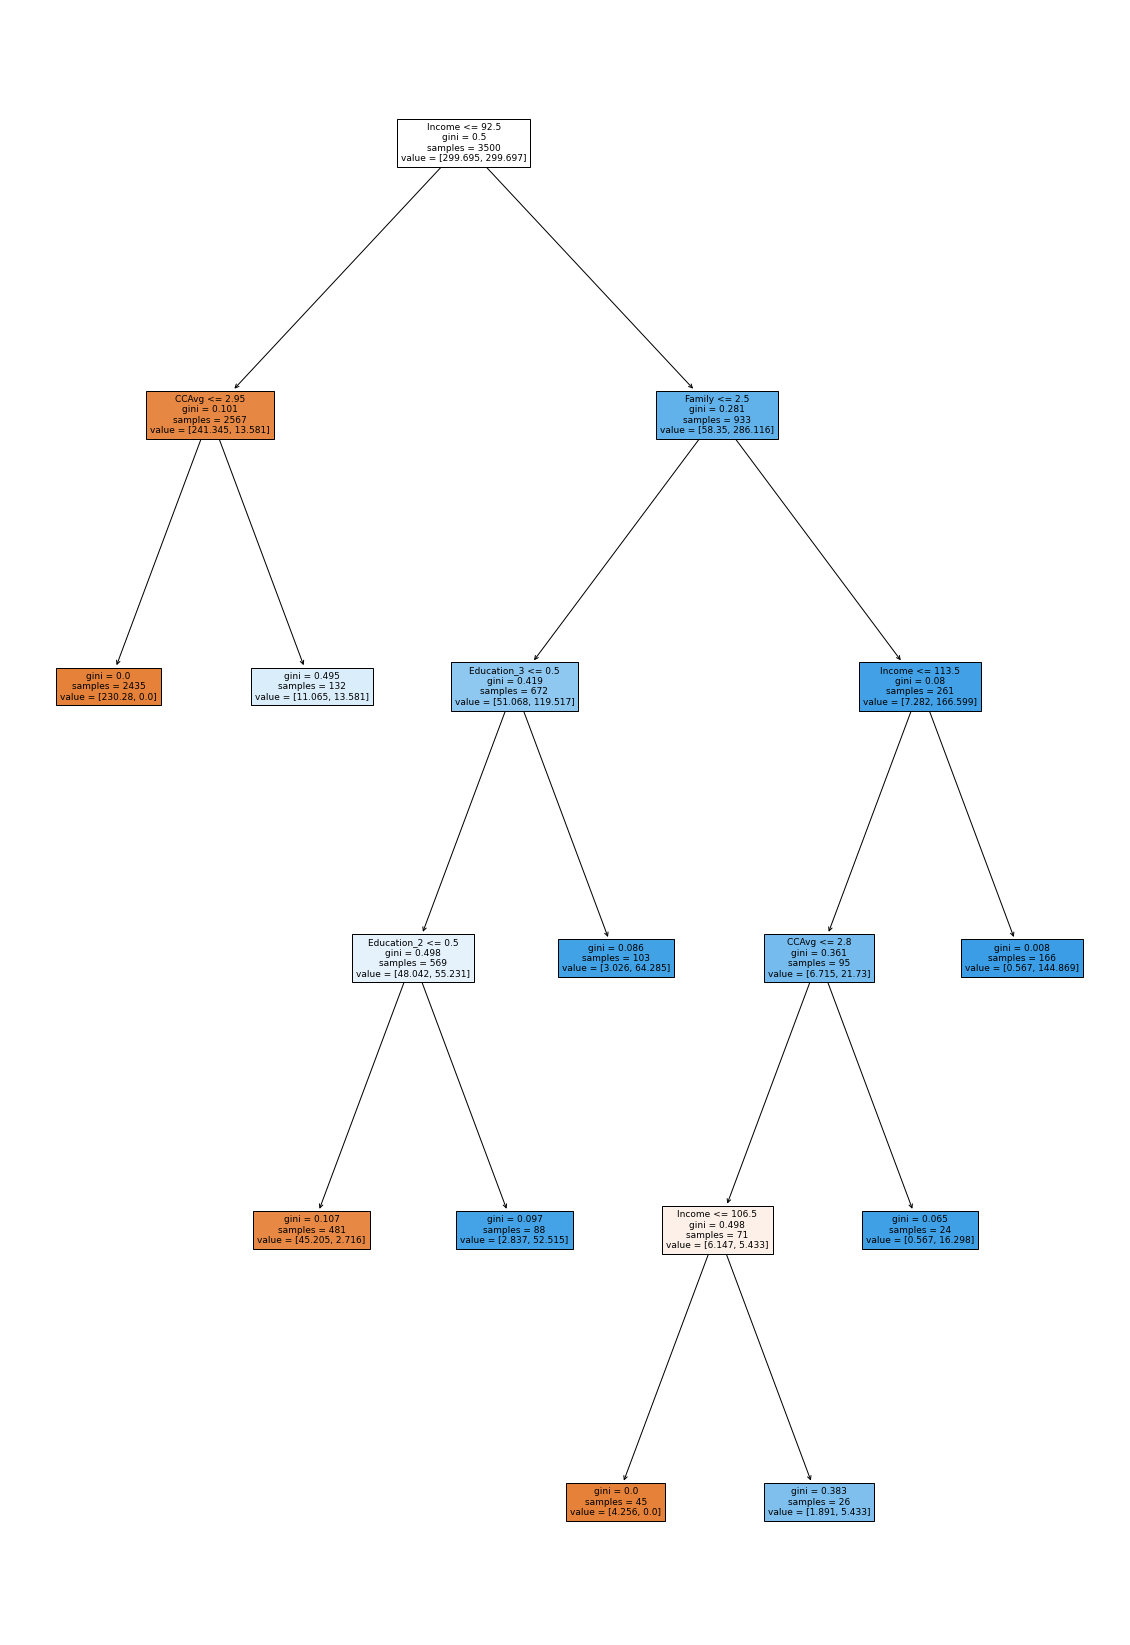

The features importances:
                         Imp
Income              0.685906
Education_2         0.153574
CCAvg               0.063550
Education_3         0.054072
Family              0.042897
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
State_CA            0.000000

[257 rows x 1 columns]


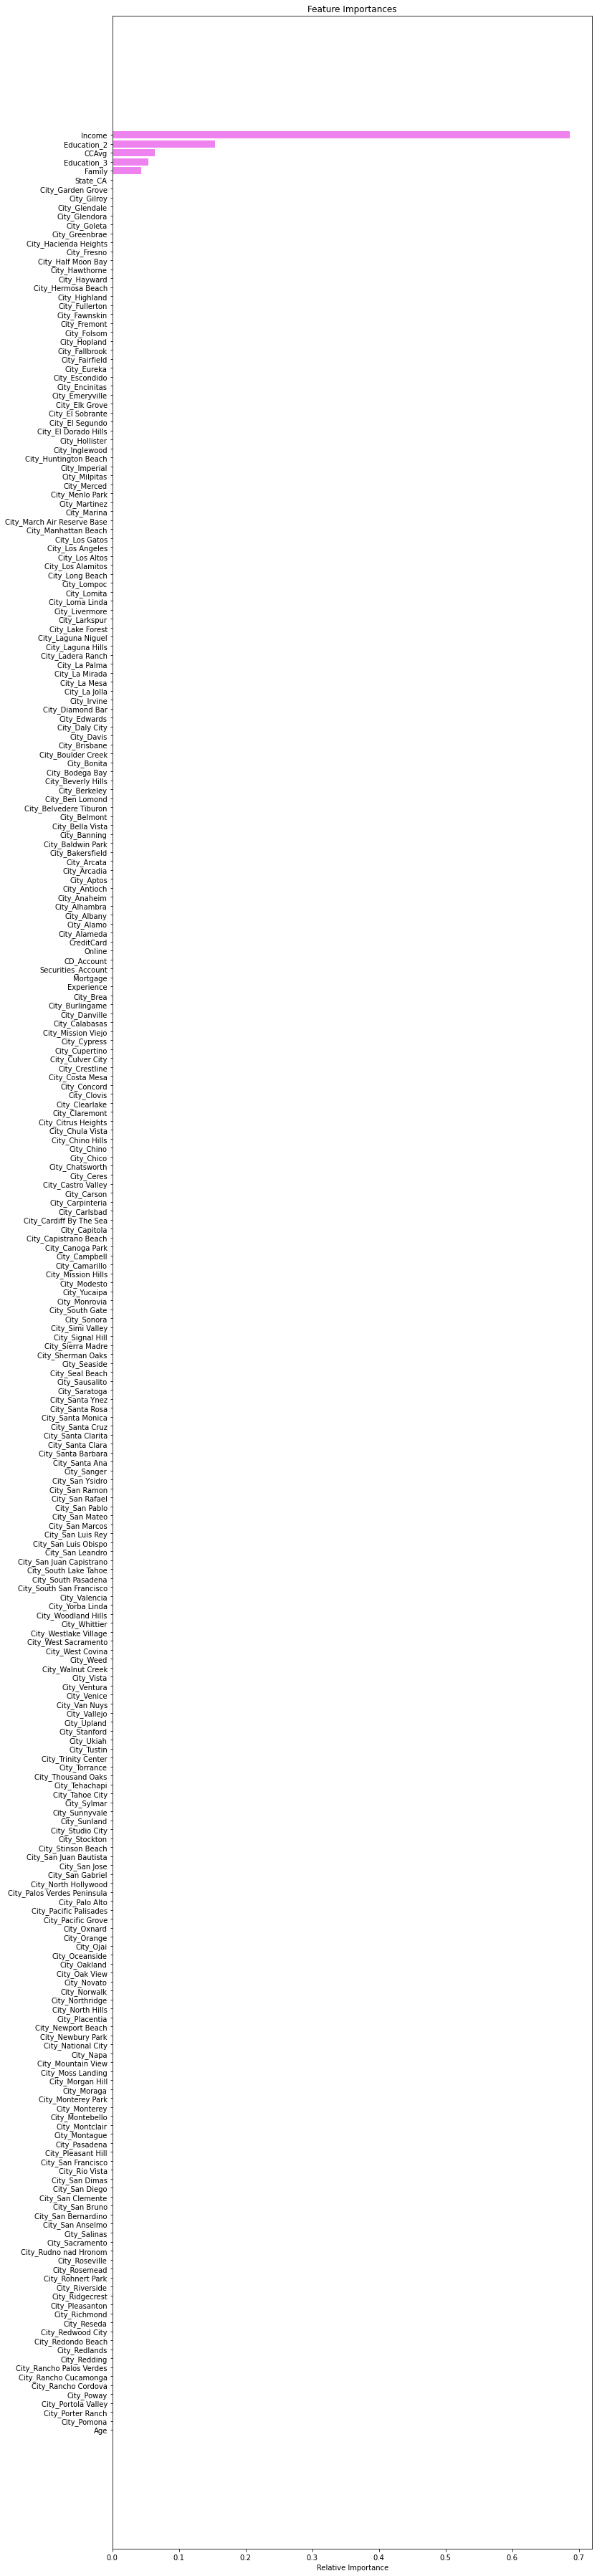

In [176]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_2.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_2, X_train, y_train)
plot_tree(PP_t_best_2,X_train)
view_nd_plot_importance(PP_t_best_2, X_train)

### Observation on PP_t_best_2 Model

- At **ccp_alpha=0.003504 and max_depth=6** the performance of **PP_t_best_2** is better then **PP_t_best_1**. Although the recall values for train and test are less, the FN% in the confusion matrix is down to half. The performance summary is:

- Recall values:
    - Recall for PP_t_best_2 on Train Data = 0.9697885196374623
    - Recall for PP_t_best_2 on Test Data = 0.9463087248322147
- Features with max importance:
    - Income                         0.676053
    - Education_2                    0.149883
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.071228
    - Education_3                    0.052773
    - Family                         0.041866

- Confusion matrix:
    - FN at 0.29%
    - FP at 2.83%

### Model Performance Evaluation_Post-pruned Tree PP_t_best_3

In [177]:
df.iloc[44]

ccp_alphas      0.004971
recall_train    0.990937
recall_test     0.979866
Name: 44, dtype: float64

In [178]:
#extracting the model from the 42nd model and fitting it to train and test data
PP_t_best_3 = PP_trees[44]
PP_t_best_3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004970964209303446,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

In [180]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_3 = get_recall_score(PP_t_best_3, X_train, y_train)
print(f'Recall for PP_t_best_3 on Train Data = {Recall_Train_PP_t_best_3}')
Recall_Test_PP_t_best_3 = get_recall_score(PP_t_best_3, X_test, y_test)
print(f'Recall for PP_t_best_3 on Test Data = {Recall_Test_PP_t_best_3}')

Recall for PP_t_best_3 on Train Data = 0.9909365558912386
Recall for PP_t_best_3 on Test Data = 0.9798657718120806


The Recall on test and train data sets are the same as stated in the dataframe df which was expected, let us move forward to visualizing the tree, the confusion matrix and feature importance

The tree depth is : 4


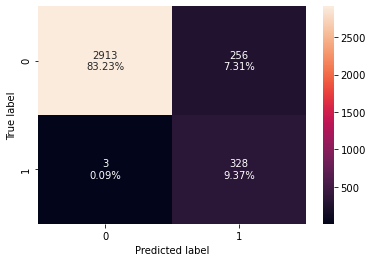

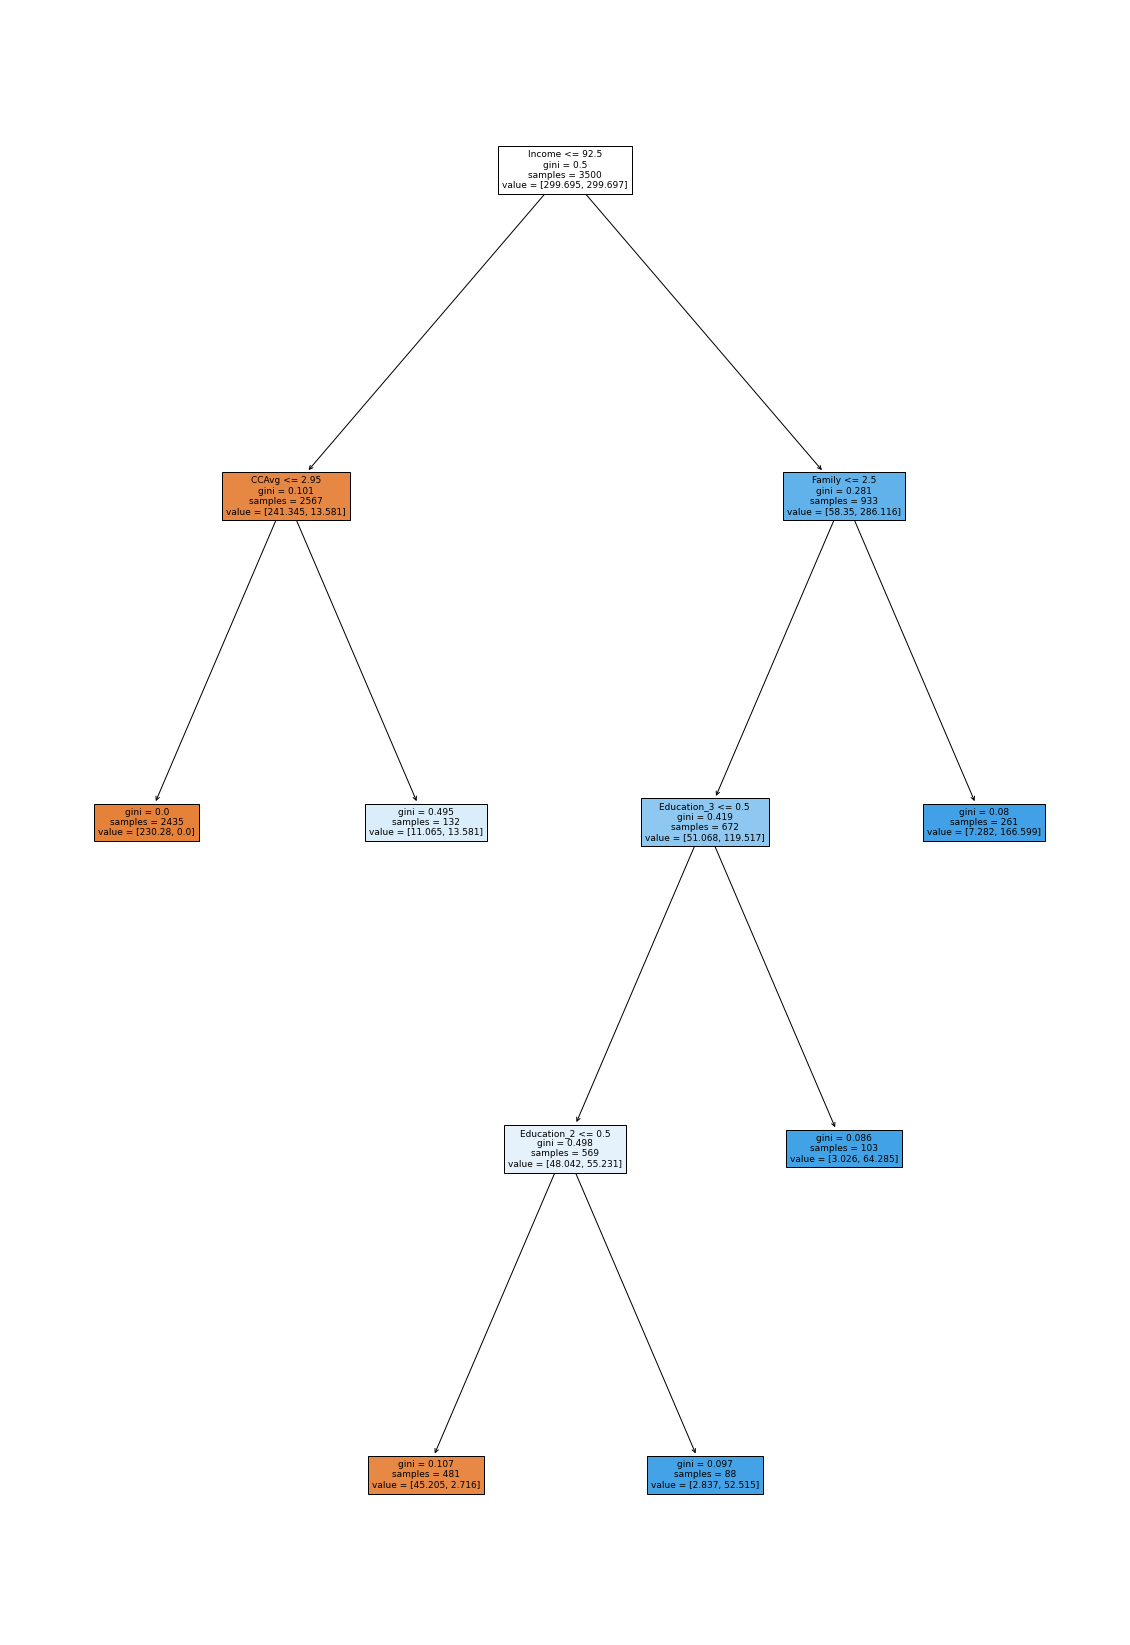

The features importances:
                         Imp
Income              0.688210
Education_2         0.158899
Education_3         0.055948
CCAvg               0.052558
Family              0.044385
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
State_CA            0.000000

[257 rows x 1 columns]


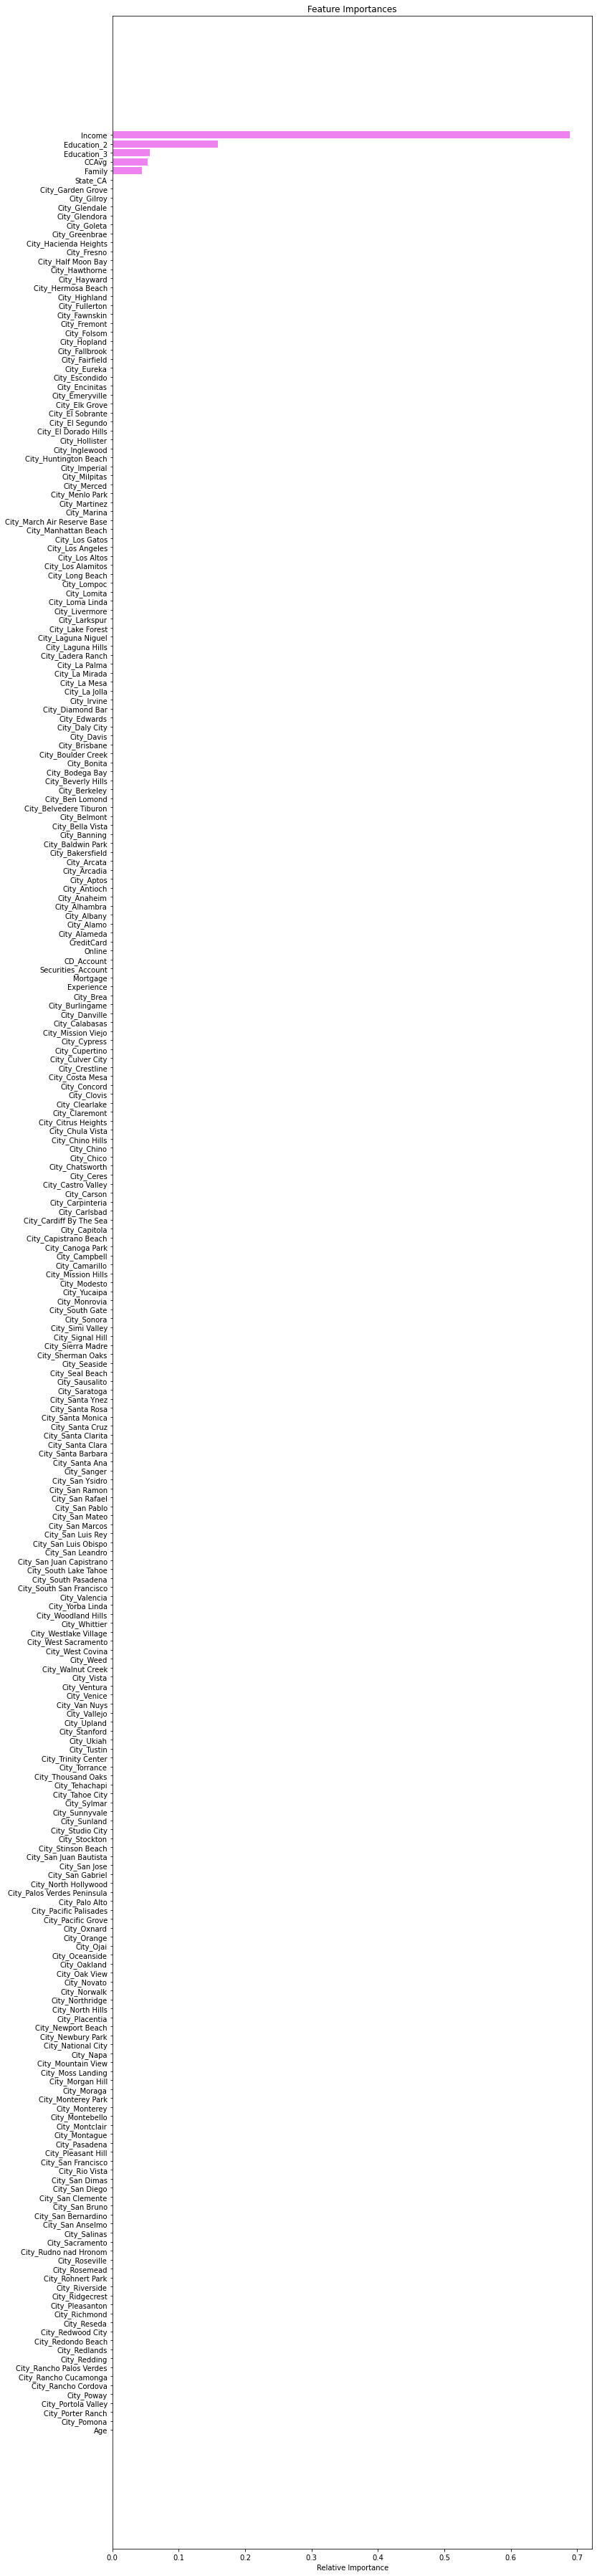

In [181]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_3.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_3, X_train, y_train)
plot_tree(PP_t_best_3,X_train)
view_nd_plot_importance(PP_t_best_3, X_train)

### Observation on PP_t_best_3 Model

- At **ccp_alpha=0.0.003730 and max_depth=5** the performance of **PP_t_best_3** is better then **PP_t_best_2**. Although the recall values for train and test are less, the FN% in the confusion matrix is down to half. The performance summary is:

- Recall values:
    - Recall for PP_t_best_3 on Train Data = 0.9909365558912386
    - Recall for PP_t_best_3 on Test Data = 0.9798657718120806
- Features with max importance:
    - Income                         0.685906
    - Education_2                    0.153574
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.063550
    - Education_3                    0.054072
    - Family                         0.042897

- Confusion matrix:
    - FN at 0.09%
    - FP at 6.03%
    


## Decision Tree Models (post-pruning)

|Model name|train_performance|recall (train)|test_performance|recall(test)|ccp_alpha|
|:--:|:--:|:--|:--|:--:|:--|
|PP_t_best_1|Recall_Train_PP_t_best_1|1.0|Recall_Test_PP_t_best_1|0.99| 0.002473|
|PP_t_best_2|Recall_Train_PP_t_best_2|0.97|Recall_Test_PP_t_best_2|0.95|0.003504|
|PP_t_best_3|Recall_Test_PP_t_best_3|0.99|Recall_Test_PP_t_best_3|0.98|0.003730|

### **Conclusion of Post-prunning**
The third and final model has a low tree depth of 5, hence less tree complexity of the tree using a greater value of alpha and it was successful in avoiding the model overfitting. Hence, The best performing model on the test set is <font color=green> **PP_t_best_3** </font> with the below alpha value


|Hyper parameter|Value|
|:--|:--:|
|ccp_alpha|0.003730|

Feature Importance:
- Features with max importance:
    - Income                         0.685906
    - Education_2                    0.153574
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.063550
    - Education_3                    0.054072
    - Family                         0.042897

#### <font color=green> End of Post-prunning </font>

# Actionable Insights & Recommendations


## Final models comparison:

|Modelling Algorithm|Model Name|mrecall (train)|recall (test)
|:--:|:--:|:--:|:--:|
|Logistic Regression|lg with threshold 0.1|0.92|0.88|
|Decision Tree (Pre Pruned)|t_1|0.99|0.95|
|Decision Tree (Post Pruned)|PP_t_best_3|0.99|0.98|



### Insights:
- The best performing model was derived from the Decision Tree Modelling technique where the original tree was post pruned via **ccp_alpha=0.0.003730** and gave the below Recall values for test and training data sets:
    - Recall for PP_t_best_3 on Train Data = 0.9909365558912386
    - Recall for PP_t_best_3 on Test Data = 0.9798657718120806
    
The statistical evidence show the Features that most affects the client decision to accept a personal loan are listed in below table with priority levels (1 being the highest priority and 5 being the lowest priority:

|Priority|Feature|Effect on customer|
|:--:|:--|:--|
|1|Income|The higher the income, the more chances the customer will accept a personal loan|
|2|Education_2|Customers with Education level 2 are more willing to accept a personal loan than levels 1 & 3|
|3|CCAvg|As the monthly spending of customers increase, the more they are willing to accept personal loan|
|4|Education_3|Customers with Education level  are more willing to accept a personal loan than level 1|
|5|Family|As familly size grows, customers are more willing to accept personal loan|

### Recommendations:
- The marketing team is recommended to study the customers profiles first before approaching them for a personal loan offer.
- The top 5 features stated in the features list above need to be considered as the target customer profile for a personal loan campaign.